# Challenge 1: The banknote-authentication data set problem

We will perform a nearly realistic analysis of the data set bank note authentication that can be downloaded from https://archive-beta.ics.uci.edu/dataset/267/banknote+authentication

## Data set description

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
These features are:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

## Task description
We have a binary classification problem. The assignment can be divided in several parts:
    
    1. Load the data and pretreatment.
    2. Data exploring by Unsupervised Learning techniques.
    3. Construction of several models of Supervised Learning.

# 1. Data pretreatment

Load the data and look at it: It is needed some kind of scaling? Why? Are the data points sorted in the original data set? Can it generate problems? How can this be solved?

--------------------------------------------------------------------

The results will be discussed in the report, which will be uploaded alongside this notebook. Therefore, this file serves only the purpose of presenting the codes necessary for completing the challenge.

## Import the dataset

In [ ]:
# Install the 'ucimlrepo' package using the pip package manager
# We need this package because it contains the dataset we are gonna use

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import os
from copy import deepcopy

FFILE = './data_banknote_authentication.txt'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://raw.githubusercontent.com/DottorBooom/Machine-Learning-Challenge/main/Challenge-one/data_banknote_authentication.txt"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.githubusercontent.com/DottorBooom/Machine-Learning-Challenge/main/Challenge-one/data_banknote_authentication.txt"

File already exists
File is readable


In [ ]:
data = pd.read_table('./data_banknote_authentication.txt', sep=",", header = None)

# Rename columns
data.rename(columns= {0:"variance",
                      1:"skewness",
                      2:"curtosis",
                      3:"entropy",
                      4:"class"}, inplace = True)

# Print
data

variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

## Analysis of dataset features

The describe function prints some values ​​that can be useful during a first
analysis (number of rows, average, max, min, etc.), reducing the time we would
have spent to obtain these values.


In [ ]:
data.describe()

variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

In [ ]:
# Print first 5 raws of the dataset
data.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Instead of plotting each pair of features and the variance of each variable individually, I rely on the pairplot function provided by seaborn. I just need to pass the dataframe to it and specify to use colors based on the class to which a banknote belongs (whether it is true or false).

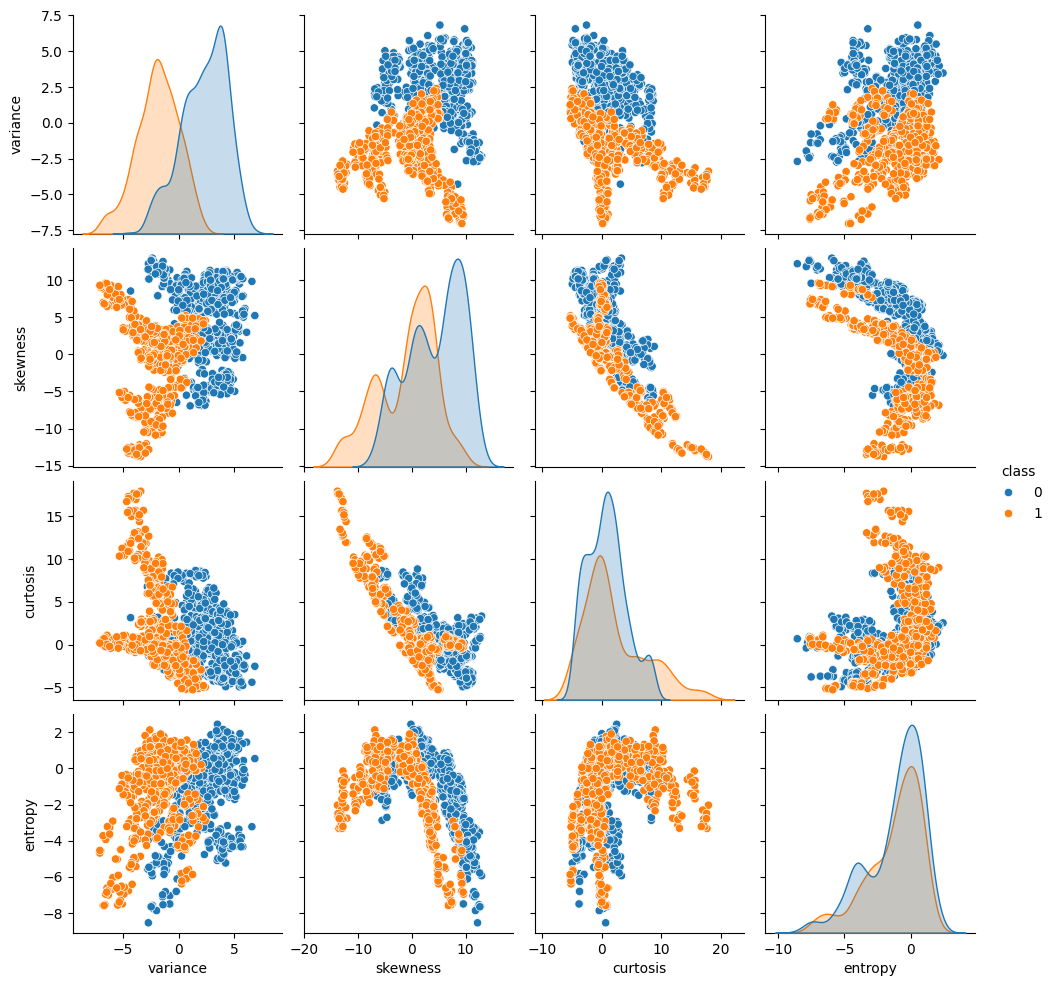

In [ ]:
from seaborn import pairplot

pairplot(data, hue = 'class')

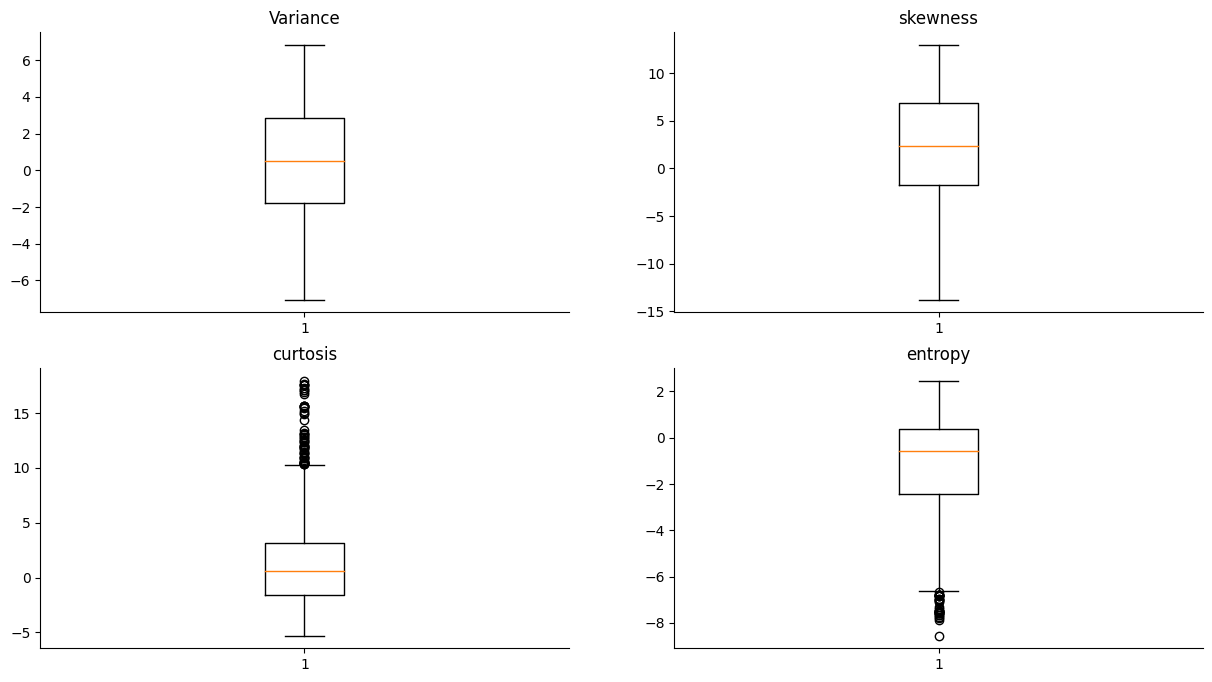

In [ ]:
# Even if the "describe()" function together with the pairplot allows us a
# complete visualization of the data, we can still use a boxplot to allow us a
# more immediate visualization of the fundamental values ​​and the status of the
# individual features.

fig = plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)

plt.boxplot(data['variance'])
plt.title('Variance')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(2, 2, 2)

plt.boxplot(data['skewness'])
plt.title('skewness')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(2, 2, 3)

plt.boxplot(data['curtosis'])
plt.title('curtosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(2, 2, 4)

plt.boxplot(data['entropy'])
plt.title('entropy')
plt.gca().spines[['top', 'right',]].set_visible(False)



## Analysis of datasets labels

In [ ]:
# Print of the dataset y
data['class']

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [ ]:
print(f"Number of index equals to 0: {len(data[data['class'] == 0])} (~55% of the dataset)\nNumber of index equals to 1: {len(data[data['class'] == 1])} (~45% of the dataset)")

Number of index equals to 0: 762 (~55% of the dataset)
Number of index equals to 1: 610 (~45% of the dataset)


## Preparation of the dataset

In [ ]:
# Since the dataset is perfectly ordered by labels (0,0,0,...1,1,1,...1), I
# concatenate the features and labels, then shuffle them, and finally split them
# back into two dataframes. I perform this process to prevent any potential
# issues that could arise from the models.

df = data.sample(frac = 1)
X = df.iloc[:,0:4]
y = pd.DataFrame(df.iloc[:,4])

In [ ]:
# I check the shape and correctness.

X.head()

variance  skewness  curtosis  entropy
766   -3.56810  -8.21300  10.08300  0.96765
253    5.28680   3.25700  -1.37210  1.16680
1109  -0.40857   3.09770  -2.96070 -2.68920
247    2.05970  -0.99326   5.21190 -0.29312
465   -2.69890  12.19840   0.67661 -8.54820

In [ ]:
y.head()

class
766       1
253       0
1109      1
247       0
465       0

In [ ]:
from sklearn.model_selection import train_test_split

# Split from training e test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=373, random_state=0)

In [ ]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      variance  skewness  curtosis   entropy
1047   1.06370   3.69570  -4.15940 -1.937900
1283   0.15423   0.11794  -1.68230  0.595240
1132  -3.38840  -8.21500  10.33150  0.981870
141    1.73170  -0.34765   4.19050 -0.991380
952   -1.28460   3.27150  -1.76710 -3.260800
...        ...       ...       ...       ...
709    3.26920   3.41840   0.20706 -0.066824
19     5.24230  11.02720  -4.35300 -4.101300
819   -1.53220  -5.09660   6.67790  0.174980
959   -6.39790   6.44790   1.08360 -6.617600
1091  -1.71010  -8.79030   7.97350 -0.454750

[999 rows x 4 columns]
      class
1047      1
1283      1
1132      1
141       0
952       1
...     ...
709       0
19        0
819       1
959       1
1091      1

[999 rows x 1 columns]
      variance  skewness  curtosis  entropy
1045 -0.014902 -1.024300 -0.940240  0.64955
638   2.721300  7.050000 -0.588080  0.41809
116   3.896900  7.416300 -1.824500  0.14007
1190 -0.831210  0.039307  0.053690 -0.23105
424   1.942900  6.396100  0.092248  0.58102
... 

## Standardization



The standardization of data is a process of transforming variables so that they have a mean of zero and a standard deviation of one.

The benefits of standardization include:
1. Comparability between Variables: Standardization makes variables comparable to each other since they are all expressed in units of standard deviations from the mean.
2. Acceleration of Convergence: In iterative optimization algorithms (such as gradient descent), standardization can speed up convergence, especially if the variables have different scales.
3. Model Performance Improvement: Some machine learning algorithms, such as Support Vector Machines (SVM) or k-Nearest Neighbors (k-NN), can benefit from standardization, enhancing the model's performance.
4. Reduction of Outlier Impact: Standardization can reduce the impact of outliers, as they have less influence on standard deviations compared to absolute values.

I have to compute the means, the variance and the max absolute value of the **training set**

In [ ]:
def standardization(data, means, std_dev, abs_max, absmax = True):
  new_data = deepcopy(data)
  if absmax == True:

    for i in new_data.columns:
      new_data[i] = new_data[i] / abs_max[i]

  else:
    for i in data.columns: # per ogni colonna (i)
      new_data[i]= ( new_data[i] - means[i] ) / std_dev[i]

  return new_data

In [ ]:
mean = np.average(X_train)
std_dev = np.std(X_train)
abs_max = X_train.abs().max()

# Training
X_train_std = standardization(X_train, mean, std_dev, abs_max, absmax = True)

# Test
X_test_std = standardization(X_test, mean, std_dev, abs_max, absmax = True)

In [ ]:
X_train_std.head()

variance  skewness  curtosis   entropy
1047  0.151049  0.268327 -0.232014 -0.246179
1283  0.021901  0.008563 -0.093840  0.075616
1132 -0.481163 -0.596453  0.576297  0.124731
141   0.245907 -0.025241  0.233748 -0.125939
952  -0.182417  0.237528 -0.098570 -0.414233

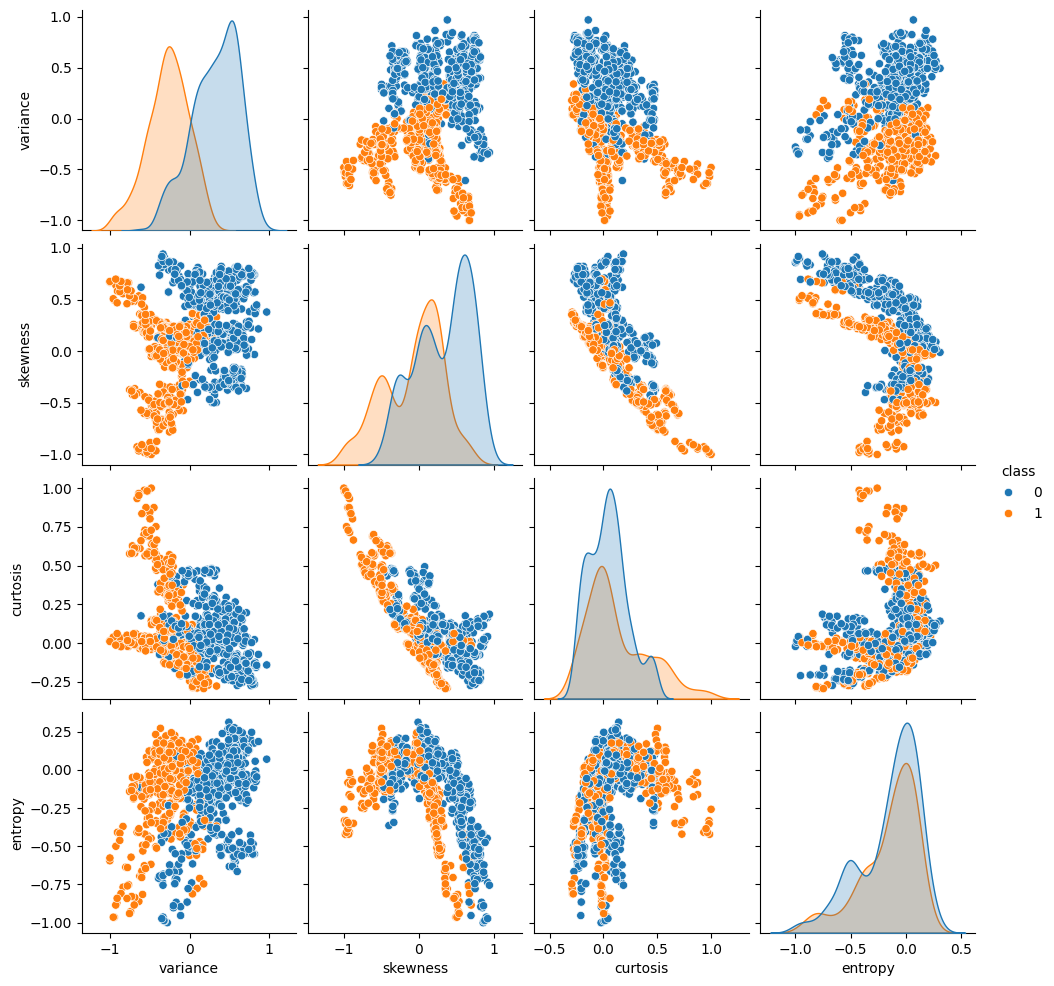

In [ ]:
#And another pairplot of the standardized train set

pairplot(pd.concat([X_train_std,y_train], axis = 1), hue = 'class')

This concludes the discussion on data standardization.
In summary, these are the variables we will use:

* `X_train`: pandas DataFrame with features for training
* `X_test`: pandas DataFrame with feature for test
* `y_train`: pandas DataFrame with label for training
* `y_test`: pandas DataFrame with label for test

and

* `X_train_std`: pandas DataFrame with feature that have been standardize for training
* `X_test_std`: pandas DataFrame with deature that have been stardarize for test

# 2. Unsupervised Learning

Use PCA and plot the two first components colouring according with the class. Are the classes linearly separable in this projection? What happens when I applied k-means with two classes in this space? And if I use all the coordinates? Try also t-SNE for projection and DBSCAN for the clustering and comment on the results.

## Principal Component Analysis (PCA)

First point of the unsupervised learning: PCA.

PCA (Principal Component Analysis) is a dimensionality reduction technique commonly used to simplify and compress data while retaining most of the original information. PCA identifies the principal directions (principal components) along which the data varies the most and projects the original data onto these directions, thereby reducing dimensionality.

PCA Steps:
1.   **Data Standardization**: Standardize the data to ensure all variables have the same scale.
2.   **Calculation of the Covariance Matrix**: Calculate the covariance matrix of standardized data.
3.   **Calculation of Eigenvalues and Eigenvectors**: Find the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors represent the principal directions, and eigenvalues indicate the variance along each direction.
4.   **Sorting of Eigenvalues**: Sort the eigenvalues in descending order.
5.   **Selection of Principal Components**: Choose the first k eigenvectors corresponding to the top k largest eigenvalues, where k is the desired new dimensionality.
6.   **Data Projection**: Project the original data onto the subspace spanned by the selected eigenvectors to obtain the new reduced data.

The first point has already been completed. The following steps will now be executed.

In [ ]:
# Since the features are already centered, we compute the covariance matrix as:
# Covariance matrix C = X^T * X
C = np.transpose(X_train_std) @ X_train_std

# Calculating eigenvectors and eigenvalues of the covariance matrix using np
eigenvalues, eigenvectors = np.linalg.eig(C)

# A list for the egenvalues and a list of lists for the eigenvectors
sorted_eigenvalues = []
sorted_eigenvectors = [[]]

# Sorting eigenvalues and corresponding eigenvectors in descending order
# Argsort create a merge that mantain the "index" of each pair of eigenvalues and
# eigenvectors even if they are un two different list
sort = np.argsort(eigenvalues[::-1])
sorted_eigenvalues = eigenvalues[sort]
sorted_eigenvectors = eigenvectors[sort]

# Print
print("Eigenvalues\n", sorted_eigenvalues)
print("\nEigenvectors\n", sorted_eigenvectors)

Eigenvalues
 [290.35872077 163.94524204  51.57405493  19.90637314]

Eigenvectors
 [[ 0.41335991  0.82510131  0.36112654 -0.13389938]
 [ 0.79891238 -0.25641477 -0.13300823  0.52754079]
 [-0.31229579 -0.05357192  0.71214663  0.62645715]
 [-0.3055224   0.500589   -0.58714872  0.55796335]]


In [ ]:
dim = 2 # Number of dimension

# Support dictionary for creating the matrix A
# I extract the first n values from the lists of eigenvalues and eigenvectors,
# which have already been sorted based on the eigenvalues.

data_dict = {}
for i in range(dim):
  data_dict[i] = sorted_eigenvectors[i]

A = pd.DataFrame(data_dict)

# X@A
PROJECTED = pd.DataFrame(X_train_std.values@A.values)

rename_columns = {}
for i in range(dim):
  new_name = f"PCA_{i+1}"
  rename_columns[i] = new_name
PROJECTED.rename(columns = rename_columns, inplace = True)

PROJECTED

PCA_1     PCA_2
0    0.233012 -0.047138
1   -0.027894  0.067673
2   -0.499613 -0.242320
3    0.182097  0.105402
4    0.140450 -0.412055
..        ...       ...
994  0.401990  0.301229
995  0.950394  0.146879
996 -0.263716 -0.116760
997  0.145118 -1.297393
998 -0.458626 -0.119991

[999 rows x 2 columns]

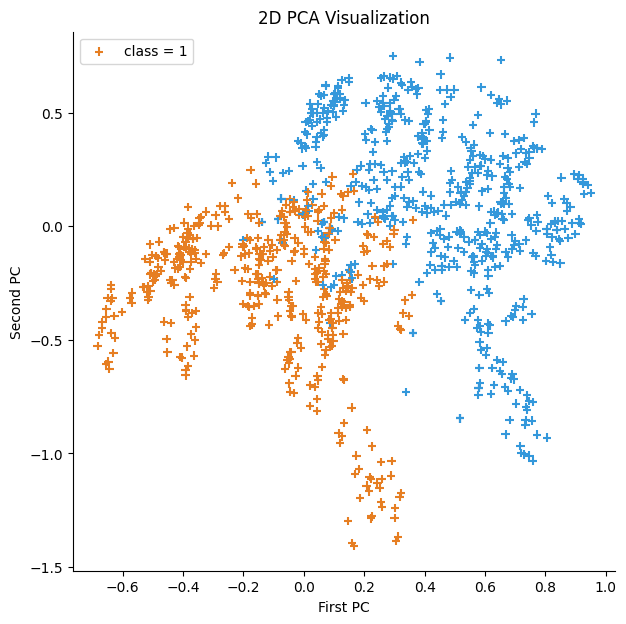

In [ ]:
# Plotting the 2D representation of the dataset using the first two Principal Components (PCs),
# with points colored by their ground truth labels.

colors = []
for i in y_train.values:
      if i == 0:
        colors.append("#3498db") # true
      else:
        colors.append("#e67e22") # false

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(PROJECTED["PCA_1"], PROJECTED["PCA_2"], c=colors, marker="+", label="class = 1")

# Setting the title of the plot
ax.set_title('2D PCA Visualization')
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
plt.legend()
plt.gca().spines[['top', 'right',]].set_visible(False)

# Displaying the plot
plt.show()

This way, we have calculated the first 2 PCs as requested in the assignment. Let's calculate the variance of all the PCs to see how much information each parameter adds to the data reduction.

In [ ]:
NC = X_test_std.shape[1]

cumulative_variance = np.zeros(NC)
total_variance = np.sum(sorted_eigenvalues)

# Accumulating the proportion of variance explained up to each component
for i in range(NC):
    cumulative_variance[i] = np.sum(sorted_eigenvalues[:i+1]) / total_variance

# Generating an array representing the components for visualization
components = np.arange(NC) + 1

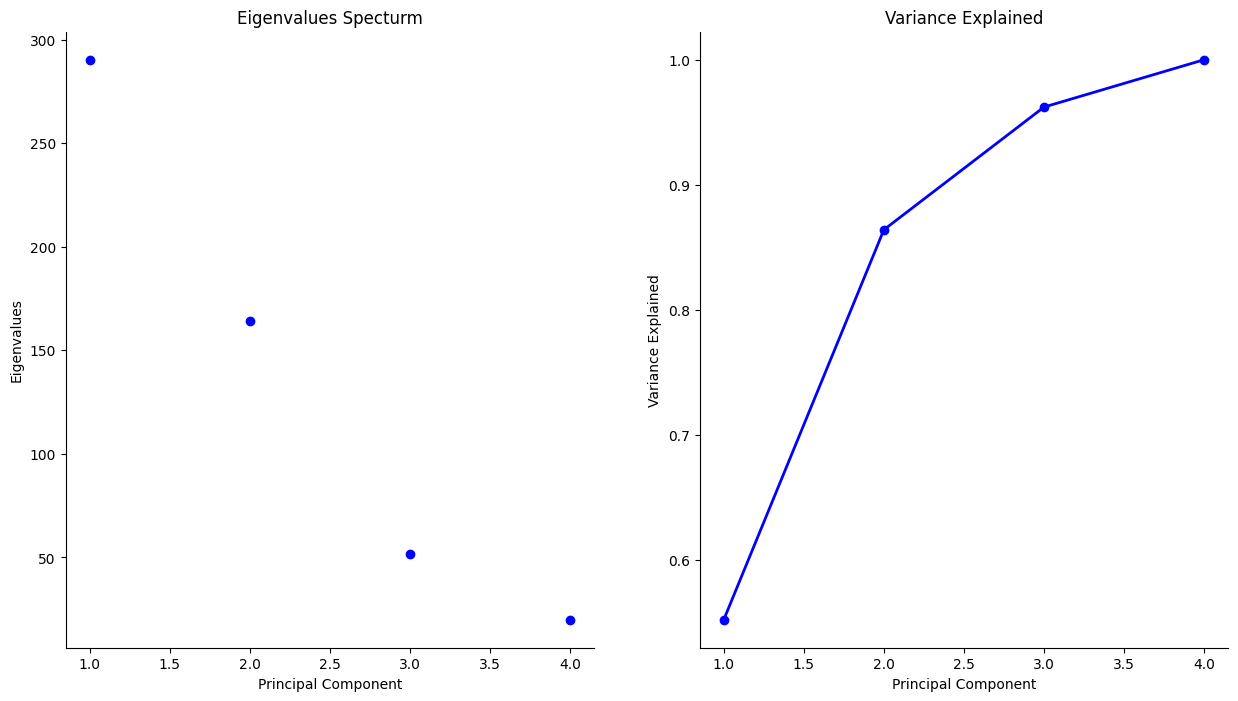

In [ ]:
# The first plot will show the eigenvalues, but the second plot it's a scree plot.
# It allows us to see which component carries more weight compared to others.

fig = plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)

plt.plot(components, sorted_eigenvalues, 'o', linewidth=2, color='blue')
plt.title('Eigenvalues Specturm')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(1,2,2)

plt.plot(components, cumulative_variance, 'o-', linewidth=2, color='blue')
plt.title('Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.show()

In [ ]:
# Same as before, the percentage of importance for each Principal Component (PCs) is calculated.

print(f'The proportion of variance explained by PC{1}: {np.round(cumulative_variance[0]*100, decimals = 4)}%')
for i in range(1,4):
    print(f'The proportion of variance explained by PC{i+1}: {np.round((cumulative_variance[i]-cumulative_variance[i-1])*100, decimals=4)}%')

The proportion of variance explained by PC1: 55.2239%
The proportion of variance explained by PC2: 31.1811%
The proportion of variance explained by PC3: 9.809%
The proportion of variance explained by PC4: 3.786%


## K-means



"K-Means is a clustering algorithm used to group similar data points into sets called clusters. The main goal of the K-Means algorithm is to divide a dataset into k clusters, where k is a predefined parameter specified by the user.

How it works:
1. **Initialization**: Randomly select
k initial centroids, one for each cluster.
2. **Assignment**: Each data point is assigned to the cluster whose centroid is closest based on Euclidean distance.
3. **Recalculation of Centroids**: Calculate the new centroid of each cluster as the mean of the points belonging to that cluster.
4. **Iteration**: Repeat steps 2 and 3 until the centroids do not change significantly or a maximum number of iterations is reached.

The objective is to minimize the sum of squared distances between each data point and the centroid of the cluster to which it belongs. This quantity is called inertia or sum of squared within-cluster (SSW) distances."

In [ ]:
# This cod  e was taken from exercise file number 5, where it is explained in
# more detail what happens in these two functions.

In [ ]:
def k_means_internal(k, X, init):
    '''
    Perform k-means clustering.

    Parameters
    ----------
    k : int
        Number of clusters.
    X : matrix of dimension N x D
        Dataset.
    init : str, {'++', 'random'}
        Type of initialization for k-means algorithm.

    Returns
    -------
    tuple
        z_new : array
            Cluster assignments for each data point.
        L : float
            Final value of the k-means objective function (loss).
        niter : int
            Number of iterations performed.
    '''
    N = X.shape[0]  # number of points
    nc = X.shape[1]  # number of coordinates
    ll = np.arange(k)
    z = np.zeros(N, dtype='int')  # cluster number assigned to each data point
    cent = np.zeros([k, nc])  # coordinates of the cluster centers

    # k-means++
    if init == '++':
        b = np.random.choice(N, 1, replace=False)  # choose the first cluster center at random
        cent[0, :] = X[b, :]
        nchosen = 1  # number of cluster centers already set

        while nchosen < k:
            dist = cdist(cent[:nchosen, :], X)  # distance of each point from the cluster centers
            dmin = np.min(dist, axis=0)  # min distance between point and cluster centers
            prob = dmin**2
            prob = prob / np.sum(prob)

            # choose next center according to the computed prob
            b = np.random.choice(N, 1, replace=False, p=prob)
            cent[nchosen, :] = X[b, :]
            nchosen += 1

    # random initialization
    else:
        b = np.random.choice(N, k, replace=False)  # choose the k centers randomly
        for i in ll:
            cent[i, :] = X[b[i], :]

    dist = cdist(cent, X)  # distance of each point from cluster centers
    z_new = np.argmin(dist, axis=0)  # assign each point to cluster with the closest center
    dmin = np.min(dist, axis=0)
    niter = 0
    L = np.sum(dmin**2)  # loss function evaluation

    while (z_new != z).any():  # until a stable configuration is reached
        z = np.copy(z_new)

        for i in range(k):
            cent[i, :] = np.average(X[z == i, :], axis=0)  # compute cluster centroids

        dist = cdist(cent, X)  # update distances from cluster centers
        z_new = np.argmin(dist, axis=0)  # find cluster with the minimum centroid distance
        dmin = np.min(dist, axis=0)
        L = np.sum(dmin**2)  # loss function evaluation
        niter += 1

    return z_new, L, niter

In [ ]:
def k_means(k, X, init='++', n_init=20):
    '''
    Perform k-means clustering with multiple initializations to find the best result.

    Parameters
    ----------
    k : int
        Number of clusters.
    X : matrix of dimension N x D
        Dataset.
    init : str, {'++', 'random'}, optional
        Type of initialization for k-means algorithm.
    n_init : int, optional
        Number of runs of the algorithm with different initializations.

    Returns
    -------
    tuple
        labels_opt : array
            Cluster assignments for each data point in the best-performing iteration.
        lmin : float
            Loss (objective function) for the best-performing iteration.
    '''
    lmin = float('inf')  # Initialize with a large value
    labels_opt = None

    for i in range(n_init):
        # Run k-means for each initialization
        labels, loss, niter = k_means_internal(k, X, init=init)

        # Check if the current iteration has a lower loss
        if loss < lmin:
            lmin = loss
            labels_opt = labels

    return labels_opt, lmin

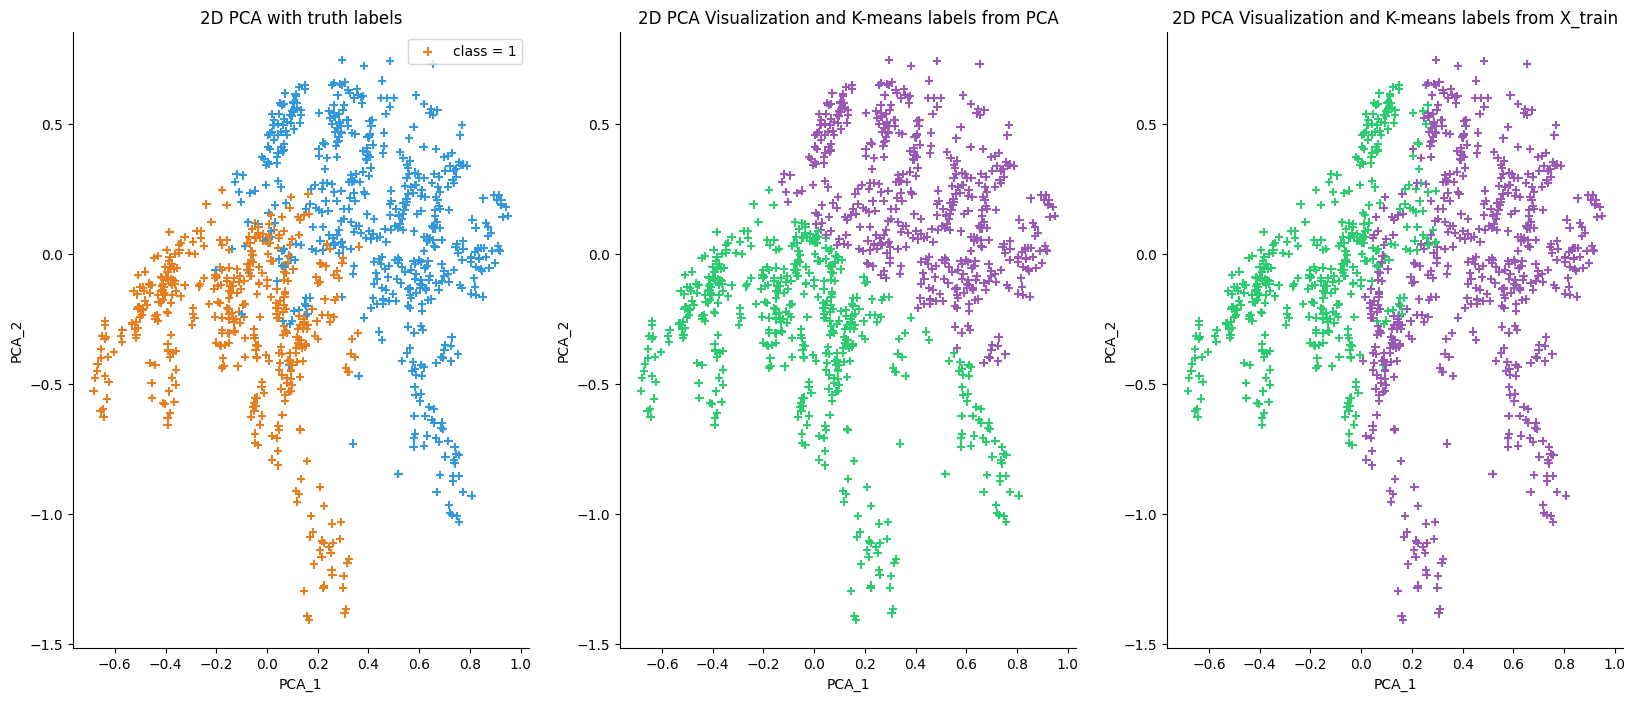

In [ ]:
# Plot the projection according to the k-means clusters
colors = []
for i in y_train.values:
      if i == 0:
        colors.append("#3498db") # true
      else:
        colors.append("#e67e22") # false


fig = plt.figure(figsize=(20, 8))

plt.subplot(1,3,1)

plt.scatter(PROJECTED['PCA_1'], PROJECTED['PCA_2'], c=colors, marker='+', label="class = 1")
plt.title('2D PCA with truth labels')
plt.xlabel(PROJECTED.columns.values[0])
plt.ylabel(PROJECTED.columns.values[1])
plt.legend()
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(1,3,2)

kmeans_labels_PCA, l_kmeans_PCA = k_means(2, PROJECTED.values, init='++', n_init=20)

colors = []
for i in kmeans_labels_PCA:
      if i == 0:
        colors.append("#2ecc71") # true
      else:
        colors.append("#9b59b6") # false

plt.scatter(PROJECTED['PCA_1'], PROJECTED['PCA_2'], c=colors, marker='+')
plt.title('2D PCA Visualization and K-means labels from PCA')
plt.xlabel(PROJECTED.columns.values[0])
plt.ylabel(PROJECTED.columns.values[1])
plt.gca().spines[['top', 'right',]].set_visible(False)

kmeans_labels_train, l_kmeans_train = k_means(2, X_train_std.values, init='++', n_init=20)

plt.subplot(1,3,3)

colors = []
for i in kmeans_labels_train:
      if i == 0:
        colors.append("#2ecc71") # true
      else:
        colors.append("#9b59b6") # false

plt.scatter(PROJECTED['PCA_1'], PROJECTED['PCA_2'], c=colors, marker='+')
plt.title('2D PCA Visualization and K-means labels from X_train')
plt.xlabel(PROJECTED.columns.values[0])
plt.ylabel(PROJECTED.columns.values[1])
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.show()


As a final step for K-Means, let's attempt to plot in multiple dimensions.


In [ ]:
dim = 3

data_dict = {}
for i in range(dim):
  data_dict[i] = sorted_eigenvectors[i]

A = pd.DataFrame(data_dict)

# X@A
PROJECTED = pd.DataFrame(X_train_std.values@A.values)

rename_columns = {}
for i in range(dim):
  new_name = f"PCA_{i+1}"
  rename_columns[i] = new_name
PROJECTED.rename(columns = rename_columns, inplace = True)

PROJECTED

PCA_1     PCA_2     PCA_3
0    0.233012 -0.047138 -0.380995
1   -0.027894  0.067673 -0.026756
2   -0.499613 -0.242320  0.670765
3    0.182097  0.105402  0.012124
4    0.140450 -0.412055 -0.285452
..        ...       ...       ...
994  0.401990  0.301229 -0.155368
995  0.950394  0.146879 -0.774677
996 -0.263716 -0.116760  0.366970
997  0.145118 -1.297393 -0.224946
998 -0.458626 -0.119991  0.390578

[999 rows x 3 columns]

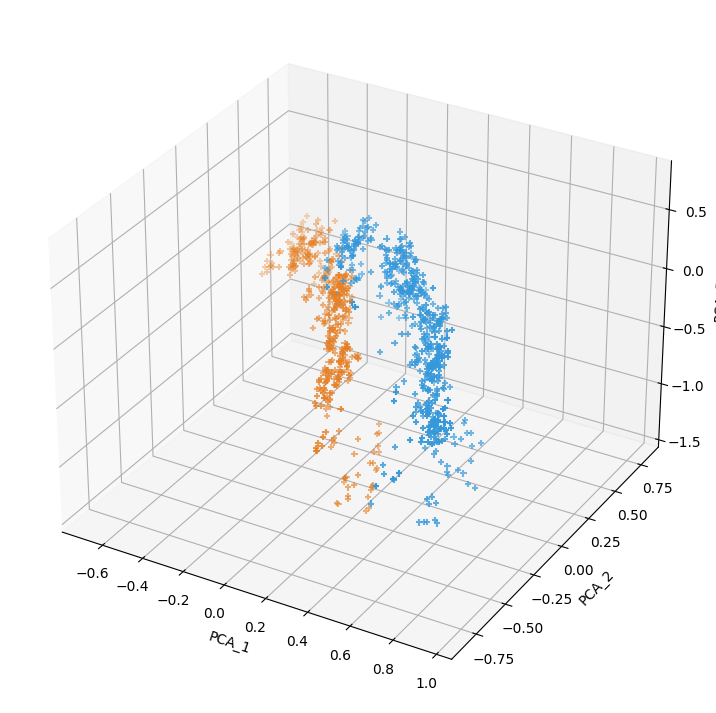

In [ ]:
# Plot the projection according to the k-means clusters
colors = []
for i in y_train.values:
      if i == 0:
        colors.append("#3498db") # true
      else:
        colors.append("#e67e22") # false

fig = plt.figure(figsize=(9, 9))

ax = fig.add_subplot(projection='3d')
ax.scatter(PROJECTED["PCA_1"], PROJECTED["PCA_3"], PROJECTED["PCA_2"], c=colors, marker="+")
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
ax.set_zlabel("PCA_3")
plt.show()

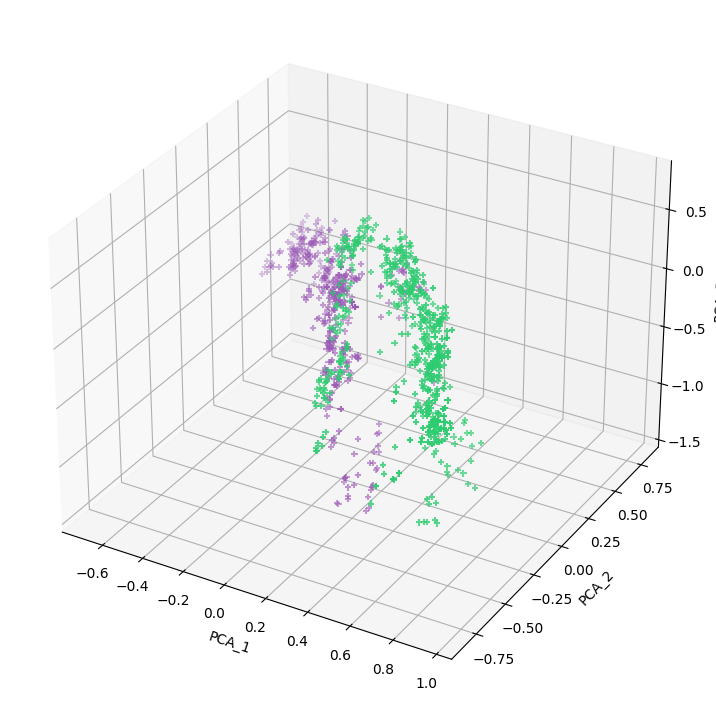

In [ ]:
kmeans_labels, l_kmeans = k_means(2, PROJECTED.values, init='++', n_init=20)

colors = []
for i in kmeans_labels:
      if i == 0:
        colors.append("#2ecc71") # true
      else:
        colors.append("#9b59b6") # false

fig = plt.figure(figsize=(9, 9))

ax = fig.add_subplot(projection='3d')
ax.scatter(PROJECTED["PCA_1"], PROJECTED["PCA_3"], PROJECTED["PCA_2"], c=colors, marker='+')
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
ax.set_zlabel("PCA_3")
plt.show()

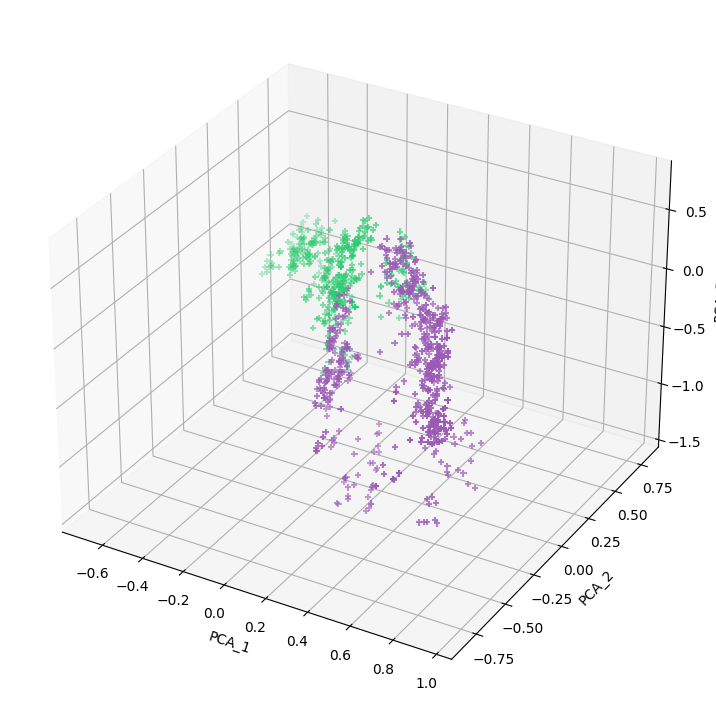

In [ ]:
kmeans_labels, l_kmeans = k_means(2, X_train_std.values, init='++', n_init=20)

colors = []
for i in kmeans_labels:
      if i == 0:
        colors.append("#2ecc71") # true
      else:
        colors.append("#9b59b6") # false

fig = plt.figure(figsize=(9, 9))

ax = fig.add_subplot(projection='3d')
ax.scatter(PROJECTED["PCA_1"], PROJECTED["PCA_3"], PROJECTED["PCA_2"], c=colors, marker='+')
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
ax.set_zlabel("PCA_3")
plt.show()

## t-SNE


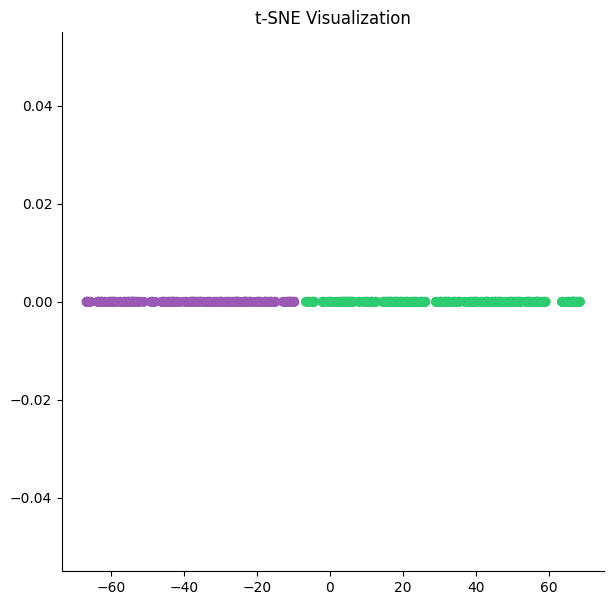

In [ ]:
# Use t-SNE to embed high-dimensional data into a 2D space for visualization
from sklearn.manifold import TSNE

# Embed the data into 1D using t-SNE
X_TSNE = TSNE(n_components=1, learning_rate='auto', init='random', perplexity=42).fit_transform(X_train_std)

colors = []
for i in y_train.values:
      if i == 0:
        colors.append("#2ecc71") # true
      else:
        colors.append("#9b59b6") # false

# Create a scatter plot of the embedded data, colored by ground truth labels
fig, ax = plt.subplots(figsize=(7, 7))

# Use a array made out of 0 for position it in the x axis
ax.scatter(X_TSNE[:, 0], [0] * X_TSNE.shape[0],  c=colors)

# Set plot title
ax.set_title('t-SNE Visualization')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Display the plot
plt.show()

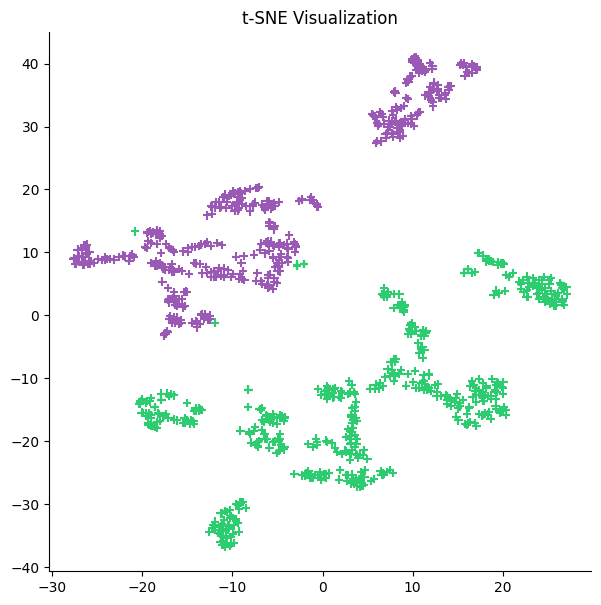

In [ ]:
# Embed the data into 2D using t-SNE
X_TSNE = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=42).fit_transform(X_train_std)

colors = []
for i in y_train.values:
      if i == 0:
        colors.append("#2ecc71") # true
      else:
        colors.append("#9b59b6") # false

# Create a scatter plot of the embedded data, colored by ground truth labels
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the 2 class genereted by the riduction
ax.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=colors, marker='+')

# Set plot title
ax.set_title('t-SNE Visualization')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Display the plot
plt.show()

## DBSCAN

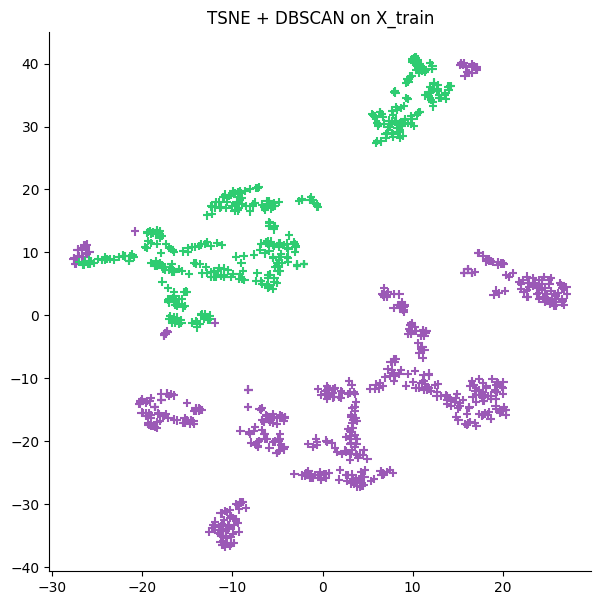

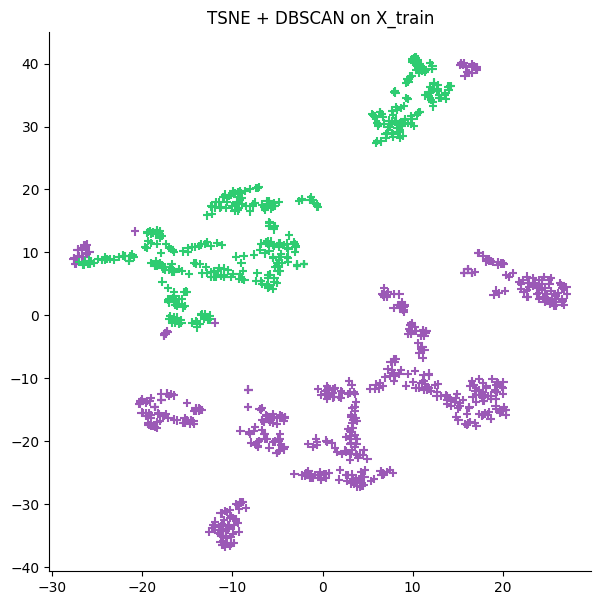

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering algorithm to the scaled data)
dbscan = DBSCAN(eps=0.15).fit(X_train_std)

colors = []
for i in dbscan.labels_:
      if i == 0:
        colors.append("#2ecc71") # true
      else:
        colors.append("#9b59b6") # false

# Visualize the clusters in a 3D scatter plot using the first three Principal Components
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=colors, marker = '+')

plt.title("TSNE + DBSCAN on X_train")
plt.gca().spines[['top', 'right',]].set_visible(False)

# Display the 3D plot
plt.show()

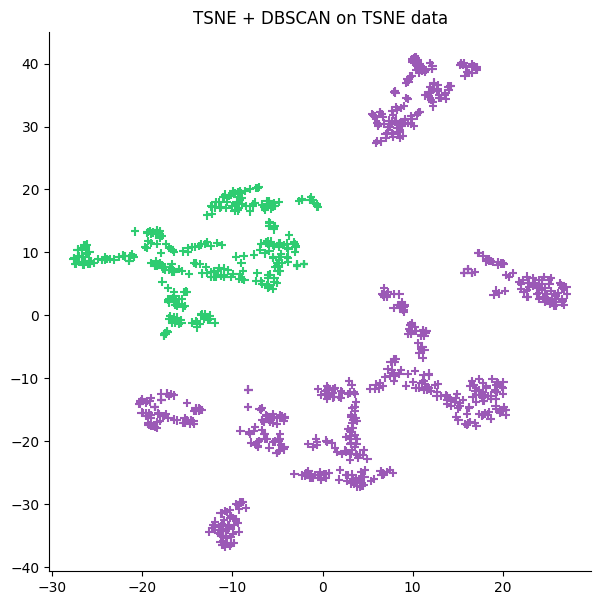

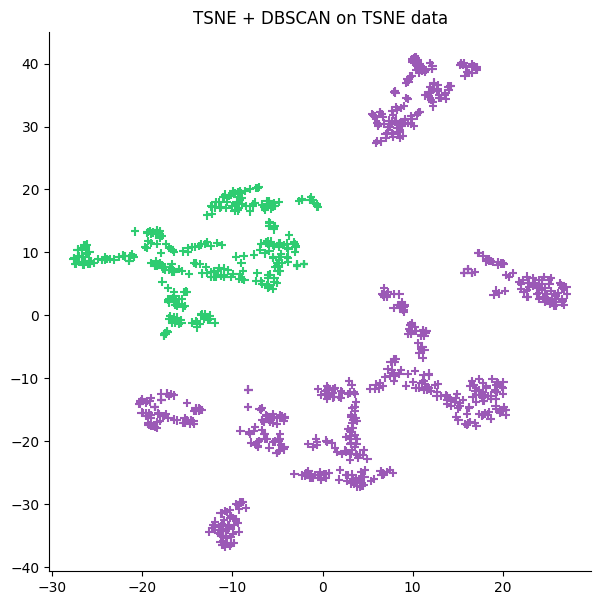

In [ ]:
# Apply DBSCAN clustering algorithm to the scaled data
dbscan = DBSCAN(eps=8.5).fit(X_TSNE)

colors = []
for i in dbscan.labels_:
      if i == 0:
        colors.append("#2ecc71") # true
      else:
        colors.append("#9b59b6") # false

# Visualize the clusters in a 3D scatter plot using the first three Principal Components
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=colors, marker = '+')

plt.title("TSNE + DBSCAN on TSNE data")
plt.gca().spines[['top', 'right',]].set_visible(False)

# Display the 3D plot
plt.show()

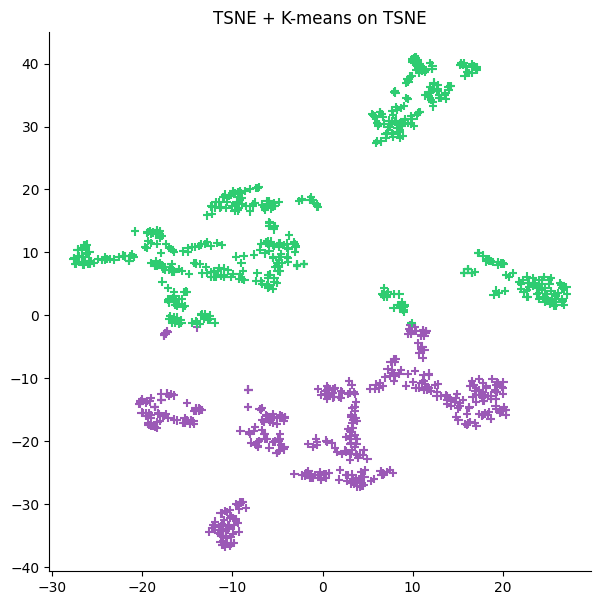

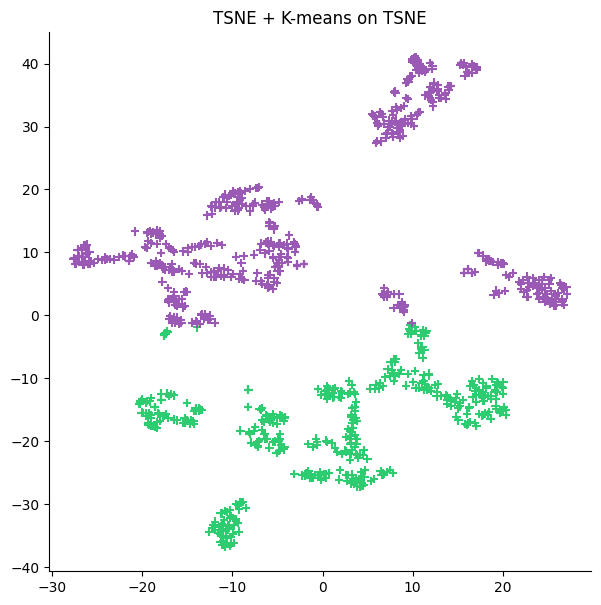

In [ ]:
kmeans_labels, l_kmeans = k_means(2, X_TSNE, init='++', n_init=20)

colors = []
for i in kmeans_labels:
      if i == 0:
        colors.append("#2ecc71") # true
      else:
        colors.append("#9b59b6") # false

# Visualize the clusters in a 3D scatter plot using the first three Principal Components
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=colors, marker = '+')

plt.title("TSNE + K-means on TSNE")
plt.gca().spines[['top', 'right',]].set_visible(False)

# Display the 3D plot
plt.show()

In [ ]:
dim = 2 # Number of dimension

# Support dictionary for creating the matrix A
# I extract the first n values from the lists of eigenvalues and eigenvectors,
# which have already been sorted based on the eigenvalues.

data_dict = {}
for i in range(dim):
  data_dict[i] = sorted_eigenvectors[i]

A = pd.DataFrame(data_dict)

# X@A
PROJECTED = pd.DataFrame(X_train_std.values@A.values)

rename_columns = {}
for i in range(dim):
  new_name = f"PCA_{i+1}"
  rename_columns[i] = new_name
PROJECTED.rename(columns = rename_columns, inplace = True)

PROJECTED

PCA_1     PCA_2
0    0.233012 -0.047138
1   -0.027894  0.067673
2   -0.499613 -0.242320
3    0.182097  0.105402
4    0.140450 -0.412055
..        ...       ...
994  0.401990  0.301229
995  0.950394  0.146879
996 -0.263716 -0.116760
997  0.145118 -1.297393
998 -0.458626 -0.119991

[999 rows x 2 columns]

PCA_1     PCA_2
0    0.233012 -0.047138
1   -0.027894  0.067673
2   -0.499613 -0.242320
3    0.182097  0.105402
4    0.140450 -0.412055
..        ...       ...
994  0.401990  0.301229
995  0.950394  0.146879
996 -0.263716 -0.116760
997  0.145118 -1.297393
998 -0.458626 -0.119991

[999 rows x 2 columns]

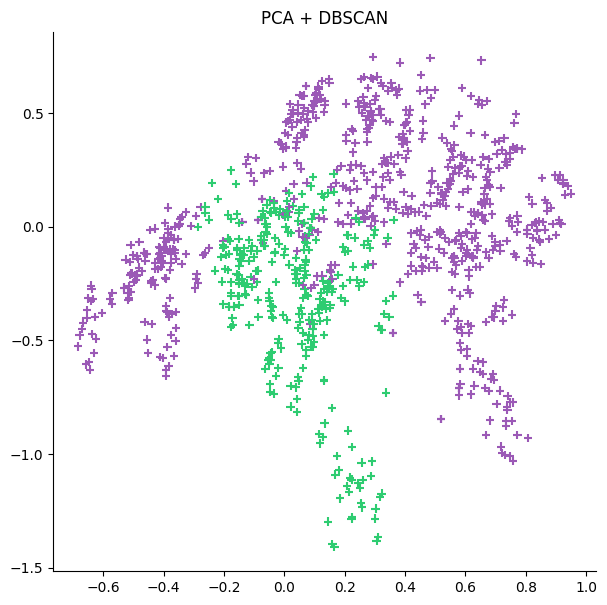

In [ ]:
dbscan = DBSCAN(eps=).fit(X_TSNE)

colors = []
for i in dbscan.labels_:
      if i == 0:
        colors.append("#2ecc71") # true
      else:
        colors.append("#9b59b6") # false

# Visualize the clusters in a 3D scatter plot using the first three Principal Components
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(PROJECTED["PCA_1"], PROJECTED["PCA_2"], c=colors, marker = '+')

plt.title("PCA + DBSCAN")
plt.gca().spines[['top', 'right',]].set_visible(False)

# Display the 3D plot
plt.show()

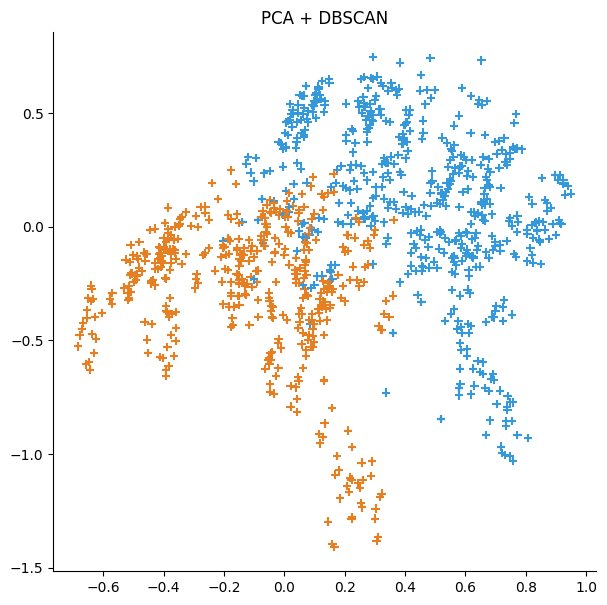

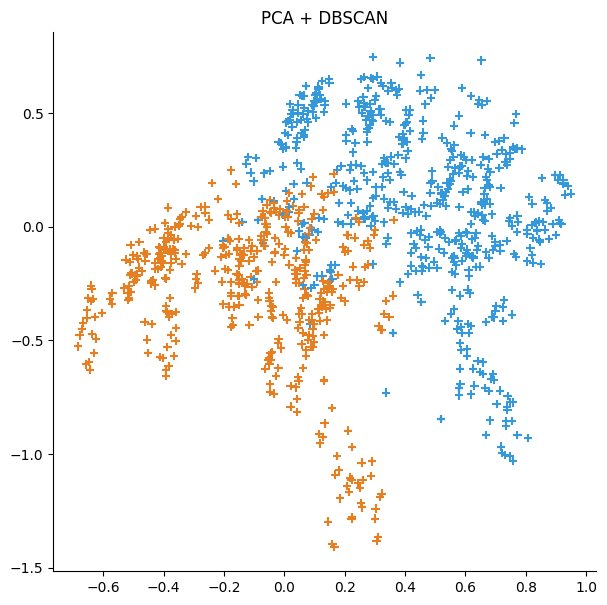

In [ ]:
colors = []
for i in y_train.values:
      if i == 0:
        colors.append("#3498db") # true
      else:
        colors.append("#e67e22") # false

# Visualize the clusters in a 3D scatter plot using the first three Principal Components
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(PROJECTED["PCA_1"], PROJECTED["PCA_2"], c=colors, marker = '+')

plt.title("PCA + DBSCAN")
plt.gca().spines[['top', 'right',]].set_visible(False)

# Display the 3D plot
plt.show()

# 3. Supervised Learning

Generate a subset of the data of 372 elements that would be saved as test set. With the rest of the data generate the following models: Logistic Regression, Decision tree (use the ID3 algorithm), Naive Bayesian and k-NN.

Investigate the effect of regularization (when possible) and use cross validation for setting the hyper-parameters when needed.

Compare the performances in terms of accuracy, precision, recall and F1-score on the test set. Comment these results at the light of those obtained from the Unsupervised Learning analysis. Could you propose a way to improve these results?     


## Logistic Regression


**Unfortunately, I couldn't resolve some issues with my Logistic Regression code. Therefore, I was compelled to use the one provided by the sklearn library.**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver = 'lbfgs').fit(X_train_std, np.ravel(y_train))

w = LR.coef_[0]
b = LR.intercept_[0]

In [ ]:
w

array([-6.9973589 , -5.47914136, -7.56154196,  0.30083477])

In [ ]:
b

1.1573829780940939

In [ ]:
# We need the full dataframe standardized for plot the regression

data_train_std = pd.concat([X_train_std, y_train], axis=1)
data_train_std

variance  skewness  curtosis   entropy  class
1047  0.151049  0.268327 -0.232014 -0.246179      1
1283  0.021901  0.008563 -0.093840  0.075616      1
1132 -0.481163 -0.596453  0.576297  0.124731      1
141   0.245907 -0.025241  0.233748 -0.125939      0
952  -0.182417  0.237528 -0.098570 -0.414233      1
...        ...       ...       ...       ...    ...
709   0.464237  0.248194  0.011550 -0.008489      0
19    0.744423  0.800633 -0.242813 -0.521005      0
819  -0.217577 -0.370040  0.372497  0.022228      1
959  -0.908522  0.468152  0.060444 -0.840661      1
1091 -0.242839 -0.638222  0.444766 -0.057769      1

[999 rows x 5 columns]

variance  skewness  curtosis   entropy  class
1047  0.151049  0.268327 -0.232014 -0.246179      1
1283  0.021901  0.008563 -0.093840  0.075616      1
1132 -0.481163 -0.596453  0.576297  0.124731      1
141   0.245907 -0.025241  0.233748 -0.125939      0
952  -0.182417  0.237528 -0.098570 -0.414233      1
...        ...       ...       ...       ...    ...
709   0.464237  0.248194  0.011550 -0.008489      0
19    0.744423  0.800633 -0.242813 -0.521005      0
819  -0.217577 -0.370040  0.372497  0.022228      1
959  -0.908522  0.468152  0.060444 -0.840661      1
1091 -0.242839 -0.638222  0.444766 -0.057769      1

[999 rows x 5 columns]

In [ ]:

def colors(y):
  color = []
  for i in y.values:
    if i == 0:
        color.append("#3498db") # true
    else:
        color.append("#e67e22") # false
  return color

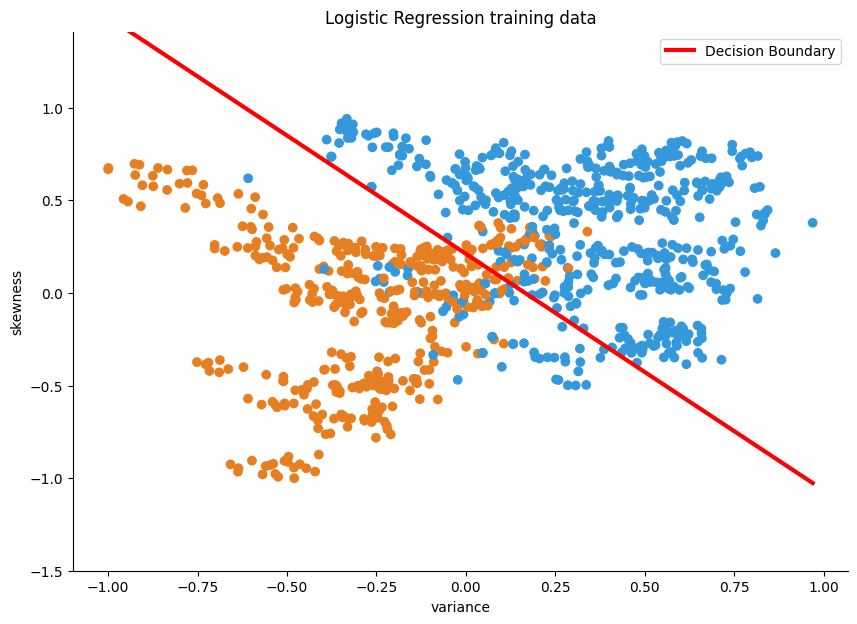

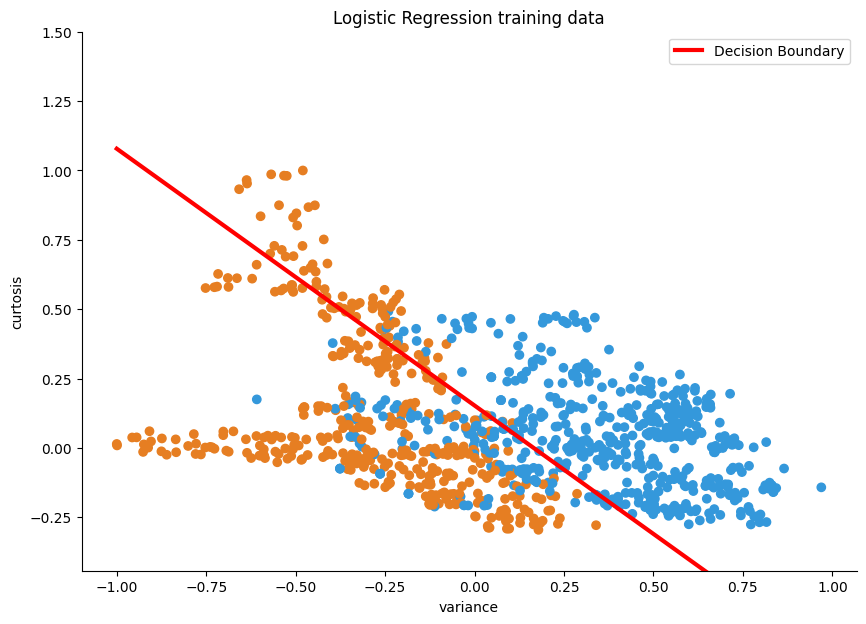

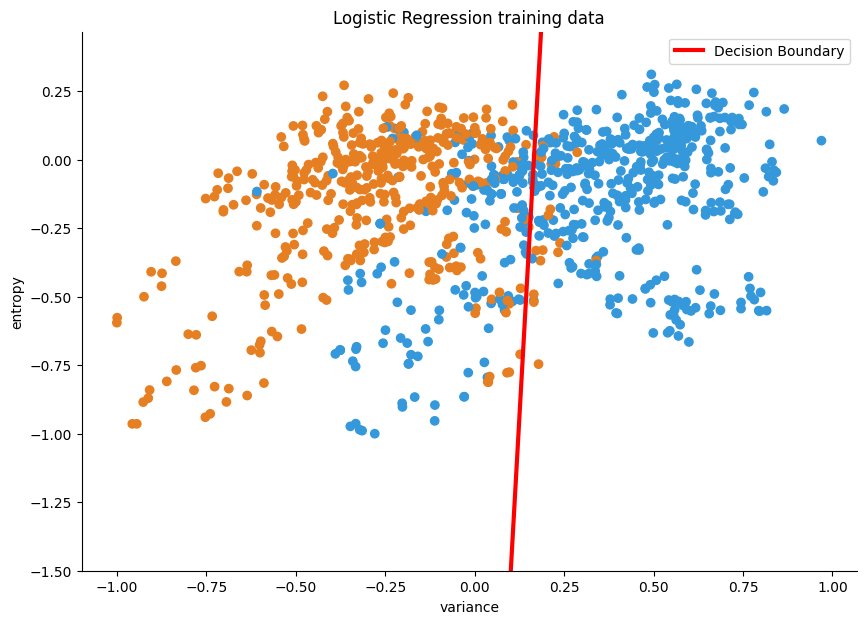

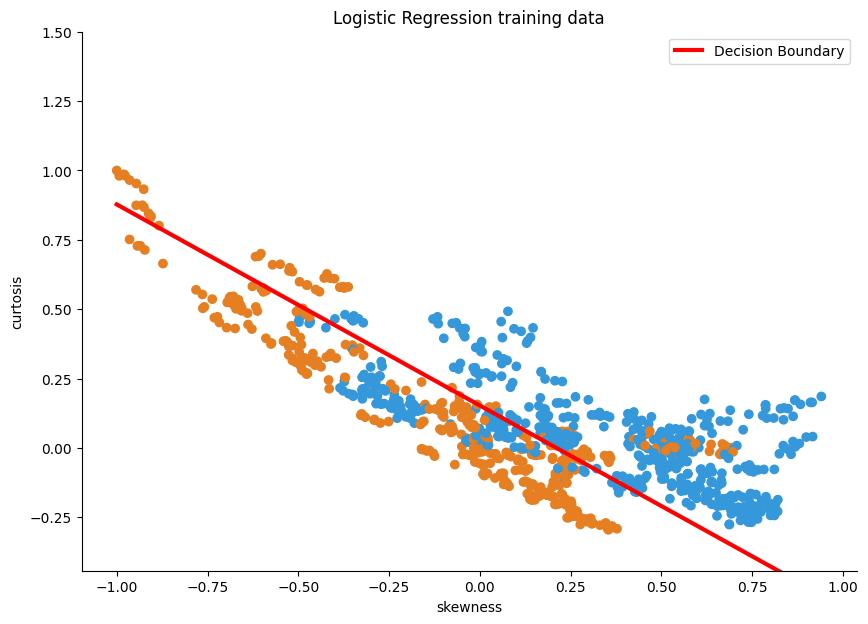

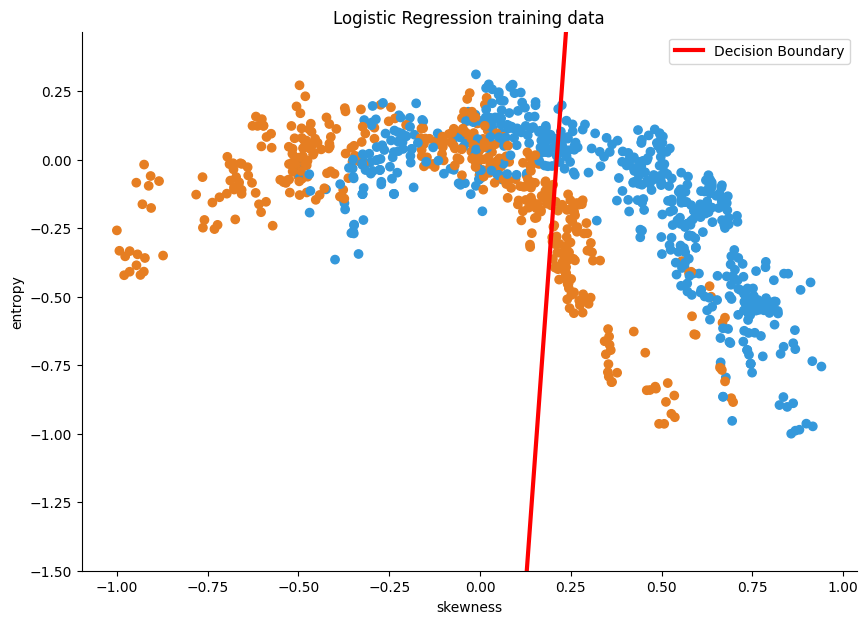

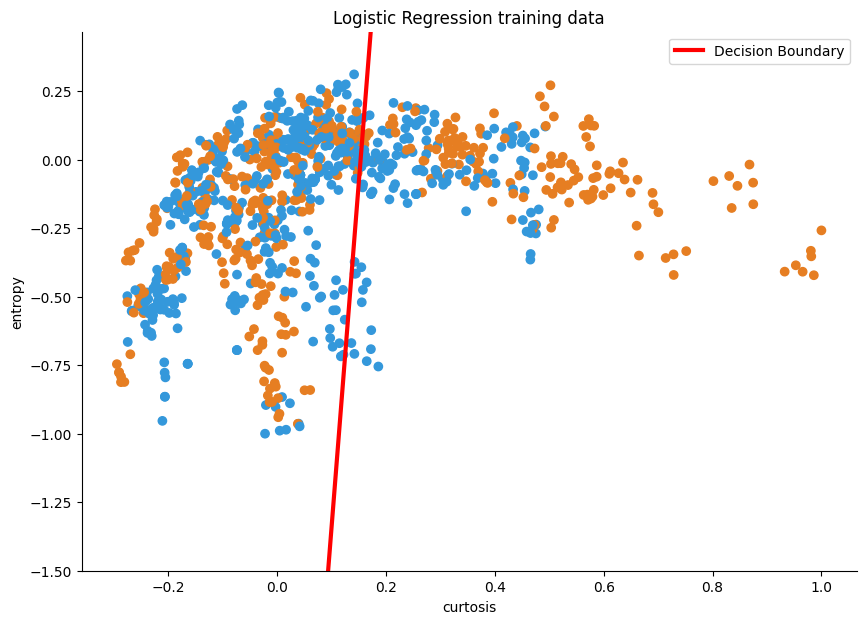

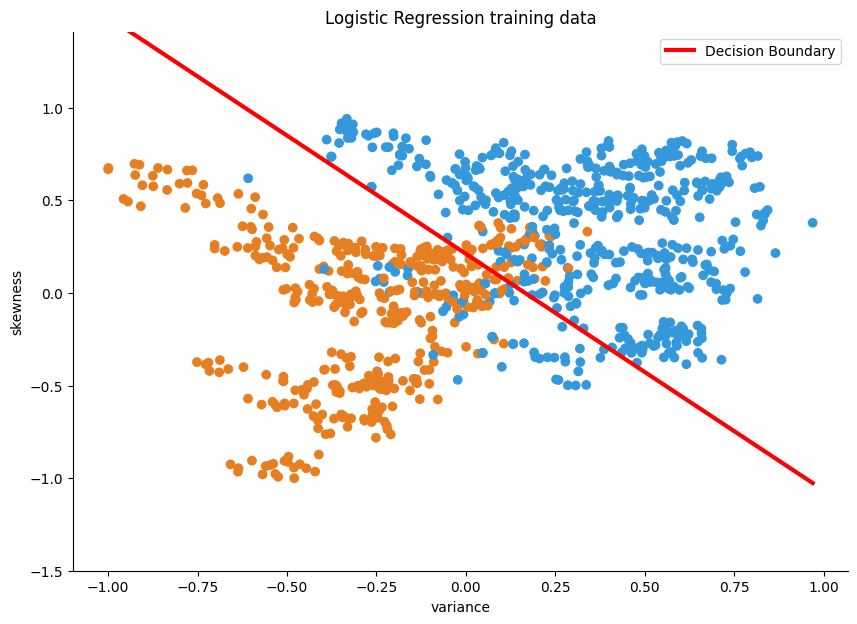

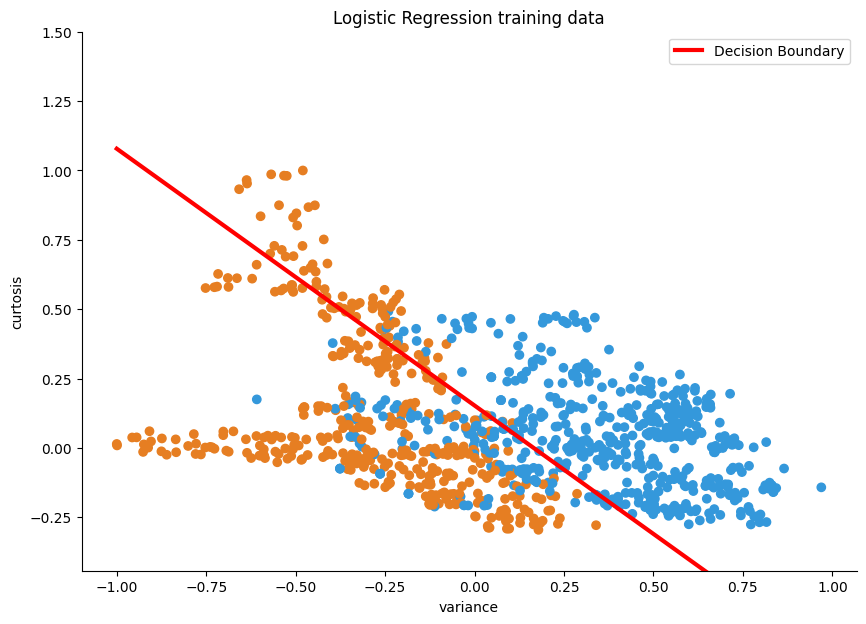

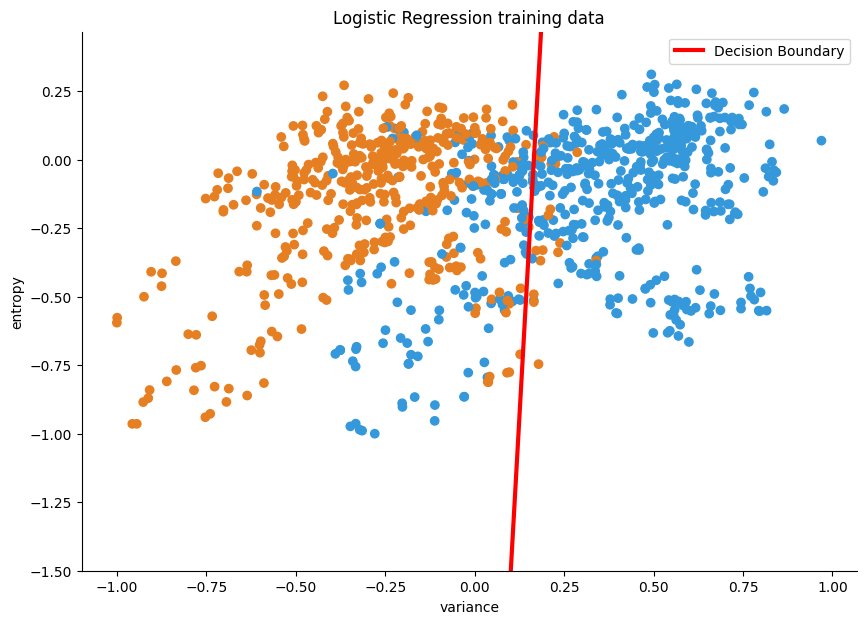

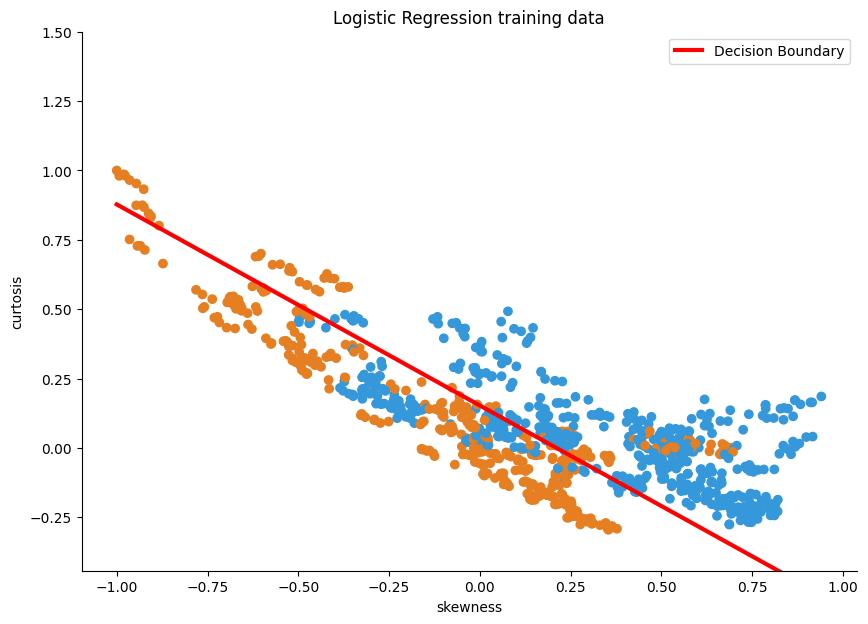

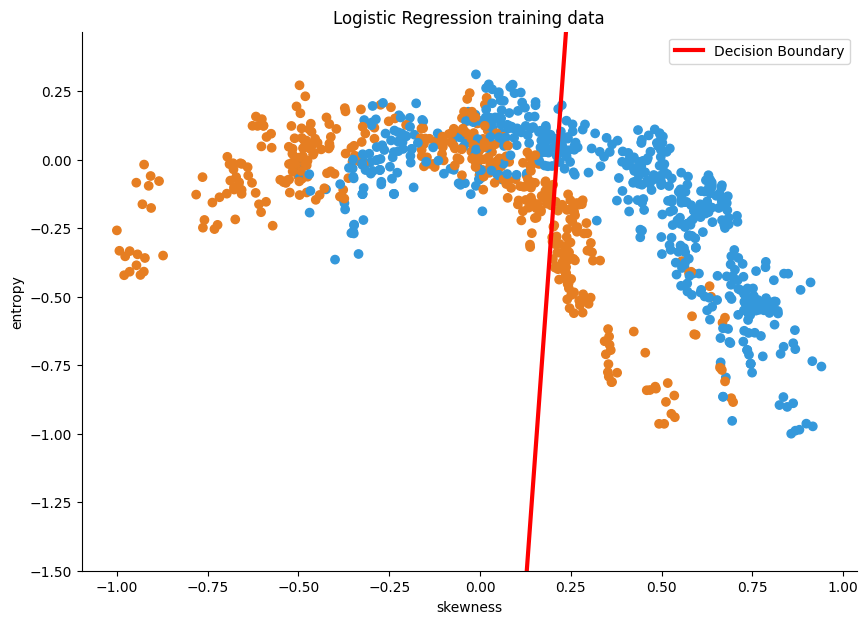

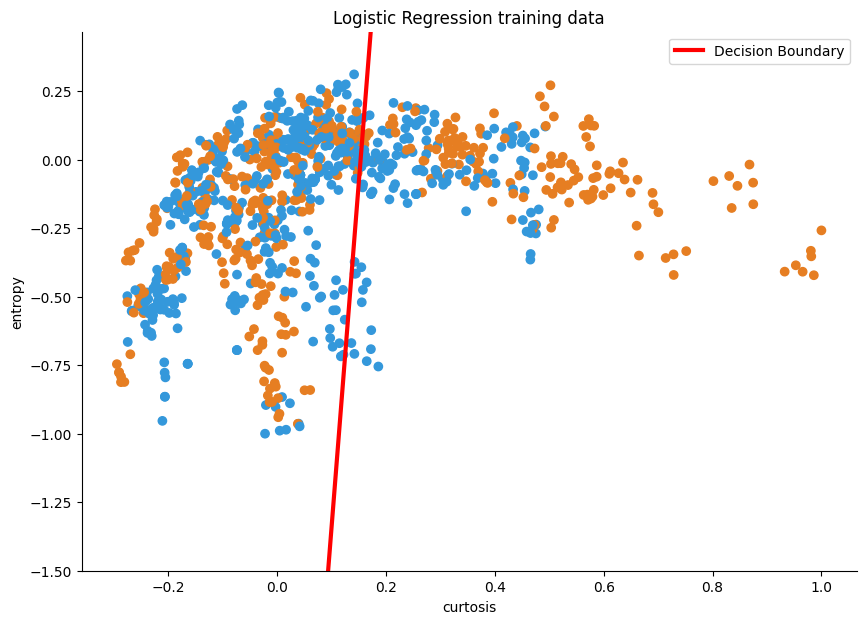

In [ ]:
# Plotting all 2D combinations of data (0-1, 0-2, 0-3, 1-2, 1-3, 2-3)

for i in range(0,3):
  for j in range(i+1,4):

    # Crea un array di x per la retta
    x_line = np.linspace(min(data_train_std.iloc[:,i]), max(data_train_std.iloc[:,i]), 100)
    y_line = -(x_line*w[i]/w[j]) - b/w[j]

    fig = plt.subplots(figsize=(10, 7))

    # Plot dei dati di addestramento
    plt.scatter(data_train_std.iloc[:, i], data_train_std.iloc[:, j], c=colors(y_train))
    plt.plot(x_line, y_line, color='red', linewidth=3, label='Decision Boundary')
    plt.ylim(min(data_train_std.iloc[:,j])*1.5, max(data_train_std.iloc[:,j])*1.5)
    plt.title('Logistic Regression training data')
    plt.xlabel(data.columns[i])
    plt.ylabel(data.columns[j])
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.legend()

plt.show()

## Results Evaluation of Logistic Regression

In [ ]:
# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test_std)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).

print("Accuracy on train:", round(LR.score(X_train_std, y_train), 4))
print('Misclassified samples: %d' % (np.ravel(y_test) != predictions).sum())

print("Accuracy on test:", round(LR.score(X_test_std, y_test), 4))
print('Misclassified samples: %d' % (np.ravel(y_test) != predictions).sum())

Accuracy on train: 0.968
Misclassified samples: 11
Accuracy on test: 0.9705
Misclassified samples: 11
Accuracy on train: 0.968
Misclassified samples: 11
Accuracy on test: 0.9705
Misclassified samples: 11


### Ratio of true/false positive/negative and ROC curve


A confusion matrix is a table that shows the number of True Positives, True Negatives, # False Positives, and False Negatives in a classification problem. It is a useful tool for assessing the performance of a classification model, and various evaluation metrics such as accuracy, precision, recall, and F1-score can be calculated from it.


[[194   5]
 [  6 168]]


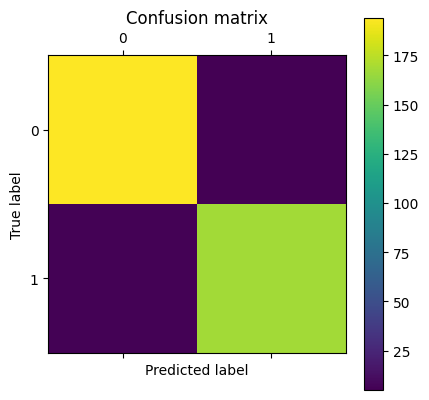

[[194   5]
 [  6 168]]


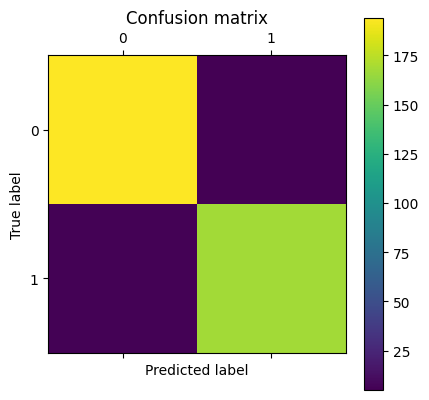

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The Receiver Operating Characteristic (ROC) curve is a graphical tool that assesses the performance of a binary classification model by varying the decision threshold. It displays the True Positive Rate (Sensitivity) as a function of the False Positive Rate.


0.9701958066193035


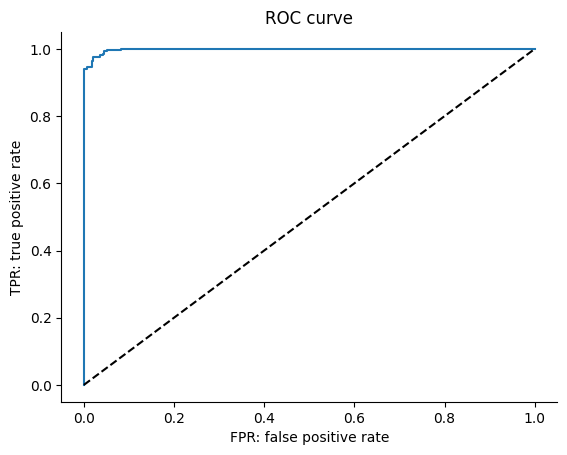

0.9701958066193035


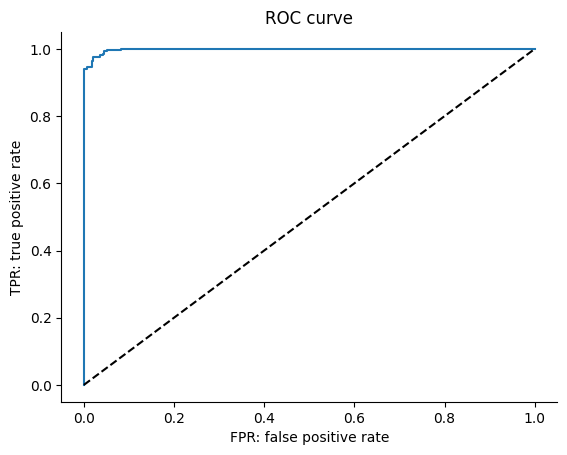

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Calculate prediction scores using the logistic function (sigmoid) on the model's
#output 'x_train_std' is the standardized training set, '@' is the matrix
# multiplication operator, and 'w' represents the model weights
y_score = 1 / (1 + np.exp(-X_train_std @ w))

# Calculate the Receiver Operating Characteristic (ROC) curve using roc_curve
# 'y_train.values' represents the true labels of the training set, and 'y_score'
# contains the predicted scores from the model
fpr_sk, tpr_sk, threshold = roc_curve(y_train.values, y_score)

# Calculate the Area Under the Curve (AUC) using the auc function
AUC = auc(fpr_sk, tpr_sk)

print(roc_auc_score(y_test.values,predictions))

plt.plot(fpr_sk, tpr_sk)
plt.plot([0,1],[0,1], "k--")
plt.title("ROC curve")
plt.xlabel("FPR: false positive rate")
plt.ylabel("TPR: true positive rate")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

### Precision, recalls and F-1


Precision is a metric that measures the accuracy of positive predictions made by a classifier. It is calculated as the ratio of true positives to the sum of true positives and false positives. Precision is a useful metric when the cost of false positives is high.

Recall, also known as Sensitivity or True Positive Rate, measures the ability of a classifier to correctly identify positive instances. It is calculated as the ratio of true positives to the sum of true positives and false negatives. Recall is a crucial metric when the cost of false negatives is high, and it provides insights into a classifier's ability to capture all positive instances.

The code uses cross-validation to evaluate the precision and recall scores of a Logistic Regression model on a standardized test set. The results are printed, showing both the average scores and the scores for each fold of the cross-validation.

In [ ]:
# Import the necessary function 'cross_val_score' from the 'sklearn.model_selection' library
from sklearn.model_selection import cross_val_score

# Calculate precision scores using cross-validation with a Logistic Regression model ('LR')
# 'x_test_std' is the standardized test set, 'y_test.values' are the true labels, and 'cv=5' specifies 5-fold cross-validation
precisions = cross_val_score(LR, X_test_std, y_test['class'].values, cv=5, scoring='precision')

# Print the average precision score and the precision scores for each fold
print('Precision:', np.mean(precisions), precisions)

# Calculate recall scores using cross-validation with a Logistic Regression model ('LR')
# 'x_test_std' is the standardized test set, 'y_test.values' are the true labels, and 'cv=5' specifies 5-fold cross-valx\idation
recalls = cross_val_score(LR, X_test_std, y_test['class'].values, cv=5, scoring='recall')

# Print the average recall score and the recall scores for each fold
print('Recalls:', np.mean(recalls), recalls)

Precision: 0.9717460317460318 [1.         0.97142857 1.         0.94444444 0.94285714]
Recalls: 0.9484033613445378 [0.91428571 0.97142857 0.91428571 0.97142857 0.97058824]
Precision: 0.9717460317460318 [1.         0.97142857 1.         0.94444444 0.94285714]
Recalls: 0.9484033613445378 [0.91428571 0.97142857 0.91428571 0.97142857 0.97058824]


The F1 score provides a balanced measure that considers both false positives and false negatives. It is particularly useful in situations where there is an uneven class distribution. A high F1 score indicates a model with good overall performance in terms of both precision and recall.

In this code, F1 scores are calculated using cross-validation with a Logistic Regression model on a standardized test set. The scoring='f1' parameter specifies that the F1 score should be used as the evaluation metric.

In [ ]:
# Calculate F1 scores using cross-validation with a Logistic Regression model ('LR')
# 'x_test_std' is the standardized test set, 'y_test.values' are the true labels,
# and 'cv=5' specifies 5-fold cross-validation

f1s = cross_val_score(LR, X_test_std, y_test['class'].values, cv=5, scoring='f1')

print('F1', np.mean(f1s), f1s)

F1 0.9592289101252552 [0.95522388 0.97142857 0.95522388 0.95774648 0.95652174]
F1 0.9592289101252552 [0.95522388 0.97142857 0.95522388 0.95774648 0.95652174]


## Add regularization

The next two paragraphs are taken from challenge zero. Therefore, I won't delve into detailed explanations as I am simply applying the formulas and transformations according to the theory of each regularization.

In [ ]:
def sigmoidM(X, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    y = 1/(1+np.exp(-np.matmul(X,w)))
    return y

In [ ]:
import numpy.linalg as LA
seed = 27

## --------- ##
## RIDGE REG ##
## --------- ##
def RidgeGradient(w, lam1):
    return 2*lam1*w

def LogisticLossRIDGE(X, labels, w, lam1):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0]
    regularization_term = lam1*LA.norm(w,2) # lambda * ||w||_2^2
    cost = -(1/n)*( np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w))) + regularization_term )
    return cost

def GDLogisticRIDGE(X, labels, iter, gamma, lam1):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    d = np.shape(X)

    cost = np.zeros(iter)

    np.random.seed(seed)
    w = np.random.uniform(0, 0.01, d[1])

    W = np.zeros((d[1], iter))

    for i in range(iter):
        W[:, i] = w

        regularization_gradient = RidgeGradient(w,lam1)
        w = w - (2 * gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels)  + regularization_gradient)

        cost[i] = LogisticLossRIDGE(X, labels, w, lam1)

    return W, cost

## --------- ##
## LASSO REG ##
## --------- ##
def L1_subgradient(z):
    g = np.sign(z)
    return g

def LassoGradient(w, lam):
    return lam * L1_subgradient(w)

def LogisticLossLASSO(X, labels, w, lam1):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0]
    regularization_term = lam1*LA.norm(w,1)
    cost = -(1/n)* ( np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w))) + regularization_term )
    return cost


def GDLogisticLASSO(X, labels, iter, gamma, lam1):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    d = np.shape(X)


    cost = np.zeros(iter)

    np.random.seed(seed)
    w = np.random.uniform(0, 0.01, d[1])
    W = np.zeros((d[1], iter))

    for i in range(iter):
        W[:, i] = w

        regularization_gradient = LassoGradient(w,lam1)
        w = w - (2 * gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels)  + regularization_gradient)

        cost[i] = LogisticLossLASSO(X, labels, w, lam1)

    return W, cost

## ----------- ##
## ELASTIC NET ##
## ----------- ##
def ElasticNetGradient(w, lam1, lam2):
    return RidgeGradient(w,lam1) + LassoGradient(w,lam2)


def LogisticLossELASTICNET(X, labels, w, lam1, lam2):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0]
    regularization_term = lam2*LA.norm(w,1)**2 + lam1*LA.norm(w,1)**2
    cost = -(1/n)* ( np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w))) + regularization_term )
    return cost

def GDLogisticELASTICNET(X, labels, iter, gamma, lam1,lam2):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    d = np.shape(X)
    cost = np.zeros(iter)
    np.random.seed(seed)
    w = np.random.uniform(0, 0.01, d[1])


    W = np.zeros((d[1], iter))

    for i in range(iter):
        W[:, i] = w

        regularization_gradient = ElasticNetGradient(w,lam1,lam2)
        w = w - (2 * gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels)  + regularization_gradient)

        cost[i] = LogisticLossELASTICNET(X, labels, w, lam1, lam2)

    return W, cost

# ----------- #
# PREDICTIONS #
# ----------- #

def LR_prediction(X,w, alpha = 0.5):
  """
  X = data
  w = coefficients
  alpha = threshold

  returns: predicted data (minimizing area)
  """
  pred = sigmoidM(X,w)
  return (pred>=alpha).astype(int)

# -------- #
# ACCURACY #
# -------- #
def accuracy(y_test, y_predicted, coefficients):
  similar = [e==y_test[i] for i,e in enumerate(y_predicted)]
  num_well_pred = sum(similar)
  N = len(similar)

  return num_well_pred/N

# --------- #
# LOSS PLOT #
# --------- #
def plot_loss(cost):
  plt.plot(cost)
  plt.title('Loss Plot')
  plt.xlabel('Iter')
  plt.ylabel('Loss')
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.show()

RIDGE acuracy:  [0.87399464]
Train Loss: 0.28333794451935584


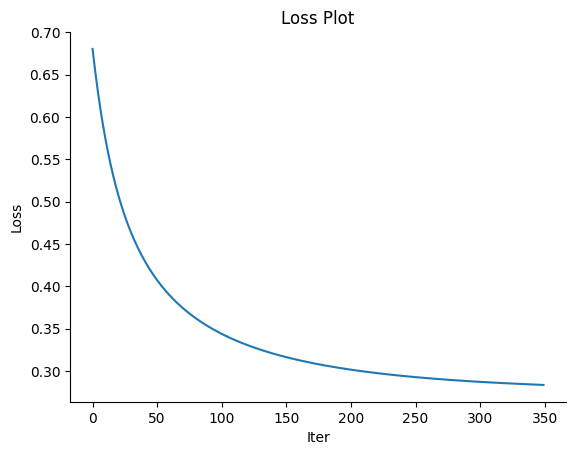

RIDGE acuracy:  [0.87399464]
Train Loss: 0.28333794451935584


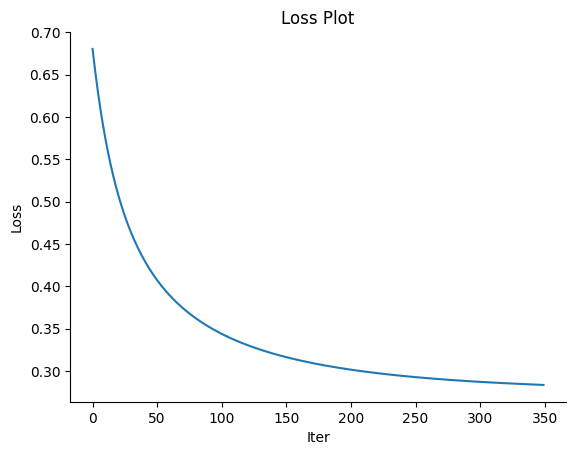

In [ ]:
# RIDGE
gamma = 0.2
alpha = 0.5

lam1 = 5

iter = 350

W, cost = GDLogisticRIDGE(X_train_std, y_train['class'].values, iter, gamma, lam1)
w_ridge = W[:,-1]
cost_ridge = cost[-1]
y_pred_ridge = LR_prediction(X_test_std,w_ridge, alpha)
print("RIDGE acuracy: ", accuracy(y_test.values, y_pred_ridge, w_ridge))
print("Train Loss:", cost_ridge)
plot_loss(cost)

LASSO acuracy  [0.92493298]
Train Loss: 0.14567285229958507


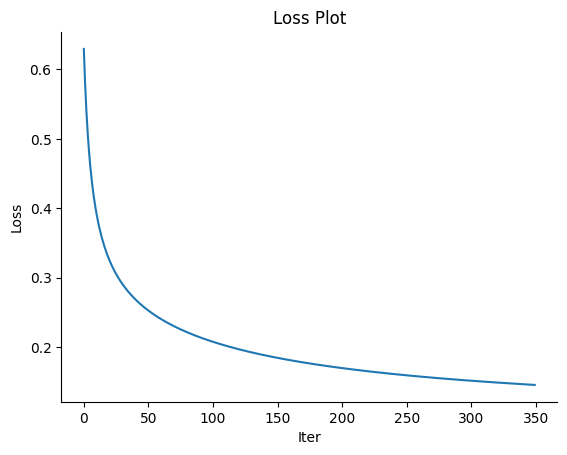

LASSO acuracy  [0.92493298]
Train Loss: 0.14567285229958507


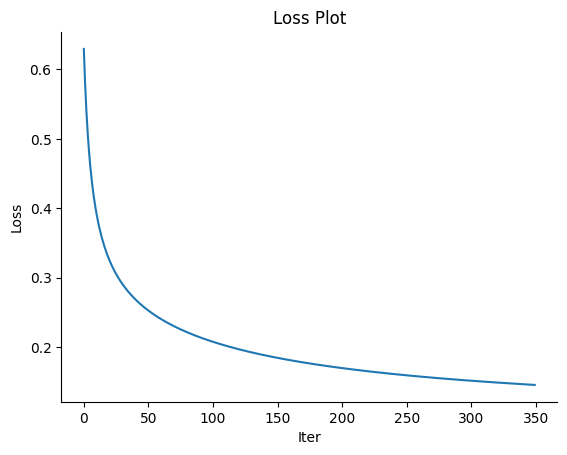

In [ ]:
# LASSO
iterator = 350
lam2 = 0.001
gamma = 1

W, cost = GDLogisticLASSO(X_train_std, y_train['class'].values, iter, gamma, lam2)
w_lasso = W[:,-1]
cost_lasso = cost[-1]
y_pred_lasso = LR_prediction(X_test_std,w_lasso, alpha)
print("LASSO acuracy ", accuracy(y_test.values, y_pred_lasso, w_ridge))
print("Train Loss:", cost_lasso)
plot_loss(cost)

Elastic net acuracy  [0.8766756]
Train Loss: 0.06529023175720512


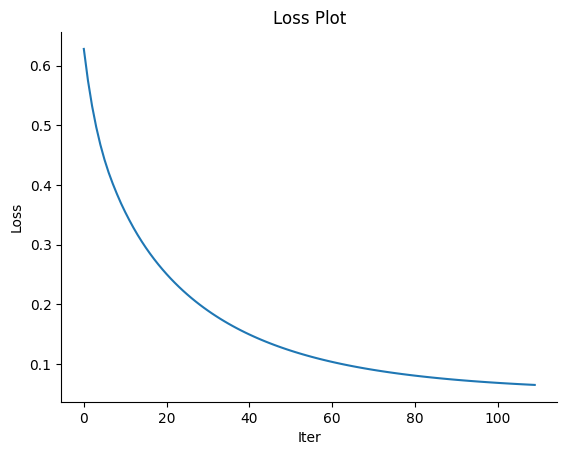

Elastic net acuracy  [0.8766756]
Train Loss: 0.06529023175720512


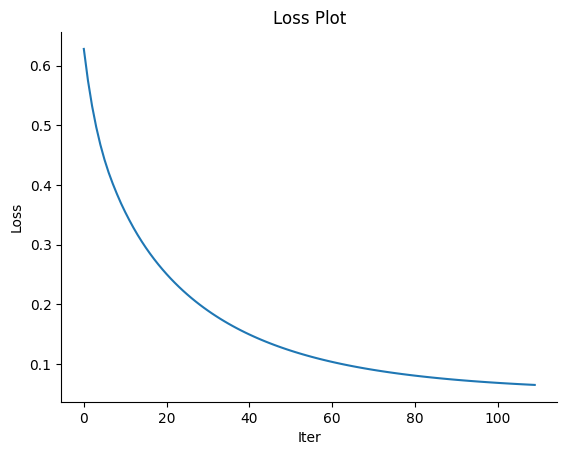

In [ ]:
# ELASTIC NET
iter = 110
W, cost = GDLogisticELASTICNET(X_train_std, y_train['class'].values, iter, gamma, lam1, lam2)
w_elasticnet = W[:,-1]
cost_elasticnet = cost[-1]
y_pred_elasticnet = LR_prediction(X_test_std,w_elasticnet, alpha)
print("Elastic net acuracy ", accuracy(y_test.values, y_pred_elasticnet, w_ridge))
print("Train Loss:", cost_elasticnet)
plot_loss(cost)

## Decision Tree (with ID3)



I decided to use the function provided by sklearn for two reasons: I couldn't implement it manually, and I wasn't confident in how to do it manually. I opted for a safe option. Below, you'll find the training of the data, the decision tree plot, and a plot of the labels predicted by the tree.

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10).fit(X_train_std, y_train)
predictions = dt.predict(X_test_std)

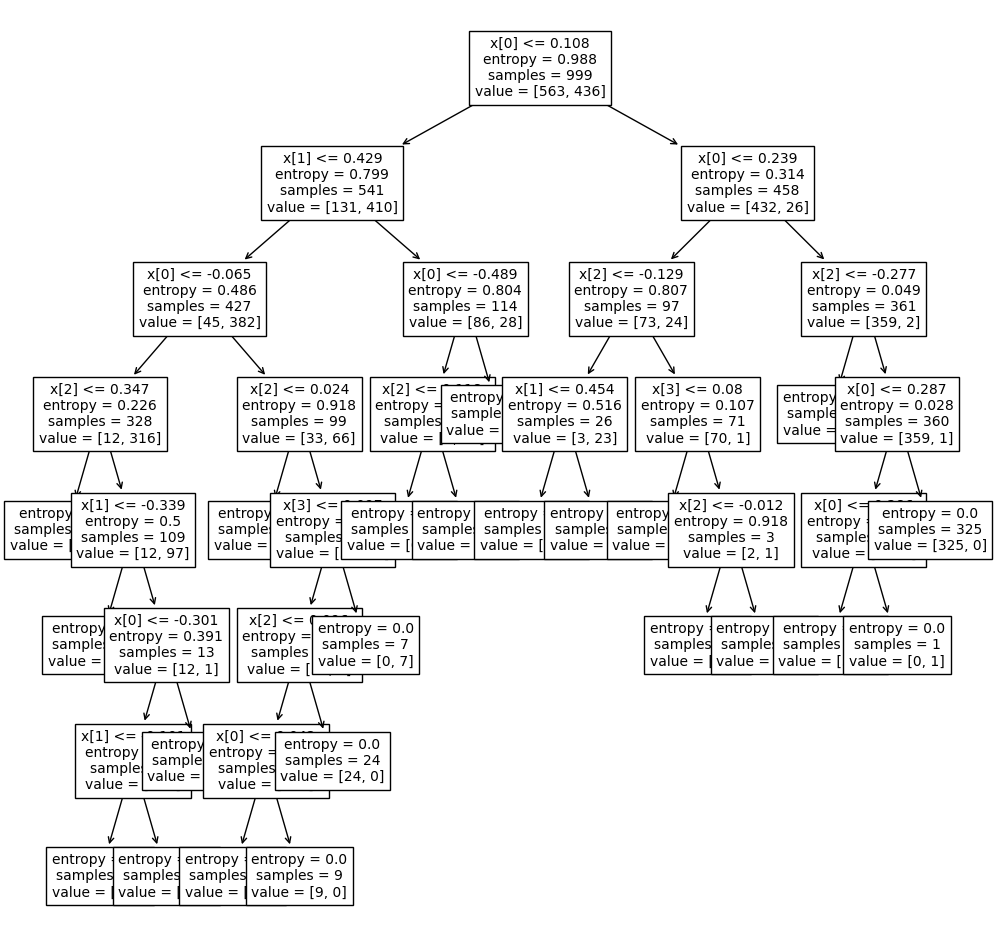

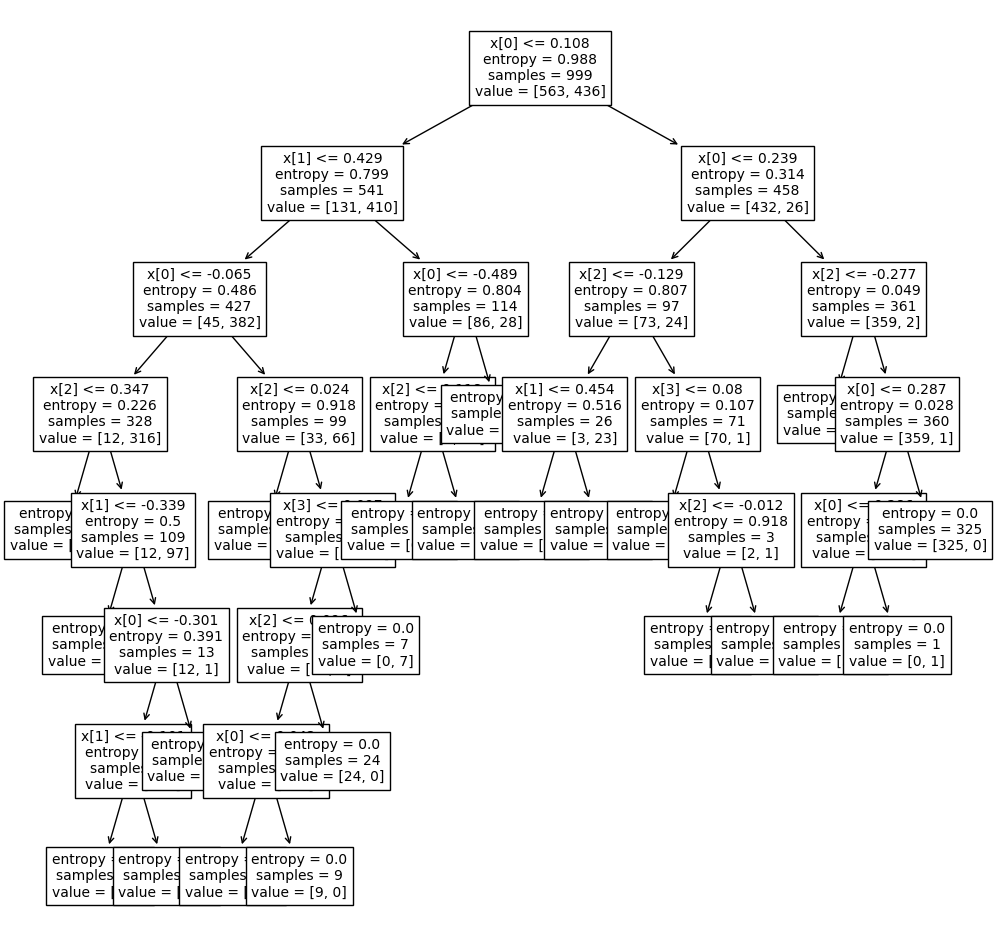

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(dt, fontsize=10)
plt.show()

In [ ]:
# Print of the acuracy of the model
dt.score(X_test_std, y_test)

0.9785522788203753

0.9785522788203753

In [ ]:
from sklearn.metrics import classification_report

# Various print of some usefull metrics as evaluetion
target_names = ['0', '1']

print(classification_report(y_test.values, predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       199
           1       0.99      0.97      0.98       174

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       199
           1       0.99      0.97      0.98       174

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373



<ipython-input-417-cc5a654e2eff>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


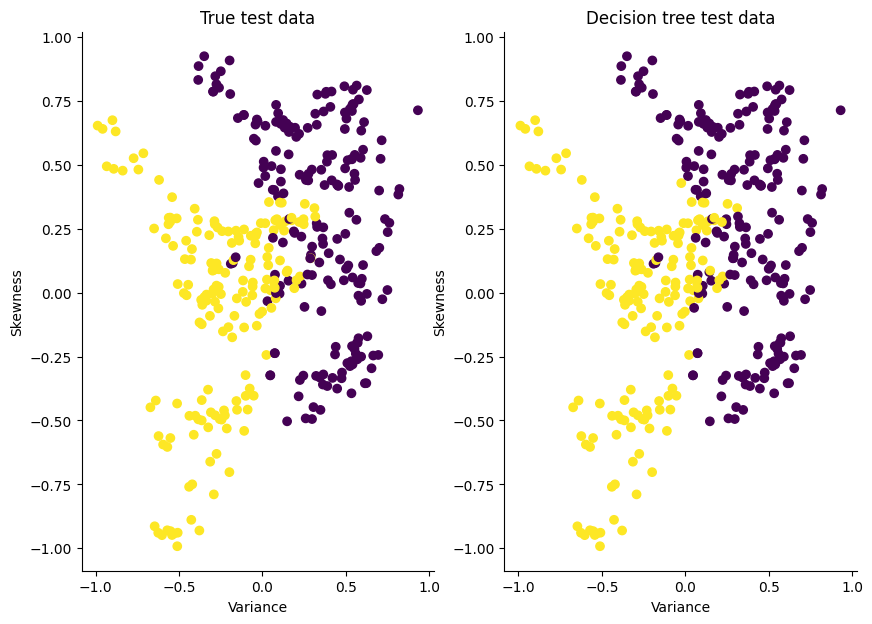

<ipython-input-450-cc5a654e2eff>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


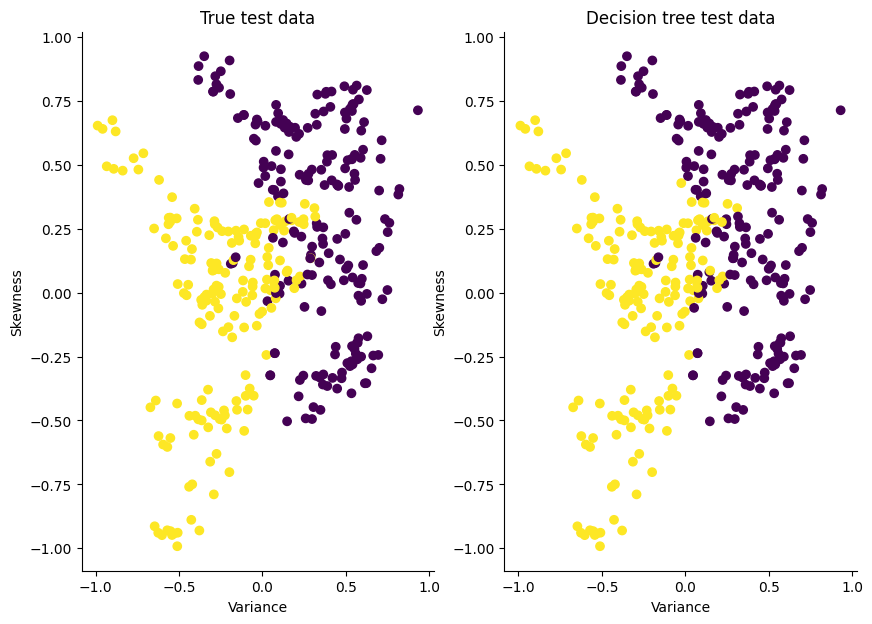

In [ ]:
fig = plt.subplots(figsize=(10, 7))

plt.subplot(1,2,1)

# Plot dei dati di addestramento
plt.scatter(X_test_std.iloc[:, 0], X_test_std.iloc[:, 1], c=y_test['class'].values)
plt.title('True test data')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(1,2,2)

# Plot dei dati di test
plt.scatter(X_test_std.iloc[:, 0], X_test_std.iloc[:, 1], c=predictions)

# Plot della retta di classificazione
plt.title('Decision tree test data')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

## Naive Bayesian

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Create Bernoulli Naive Bayes classifier
bnb = BernoulliNB().fit(X_train_std, y_train['class'].values)

# Make predictions
predictions = bnb.predict(X_test_std)

In [ ]:
bnb.score(X_test_std, y_test)

0.839142091152815

In [ ]:
# Various print of some usefull metrics as evaluetion
target_names = ['0', '1']

print(classification_report(y_test['class'].values, predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       199
           1       0.86      0.79      0.82       174

    accuracy                           0.84       373
   macro avg       0.84      0.84      0.84       373
weighted avg       0.84      0.84      0.84       373

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       199
           1       0.86      0.79      0.82       174

    accuracy                           0.84       373
   macro avg       0.84      0.84      0.84       373
weighted avg       0.84      0.84      0.84       373



<ipython-input-420-736dc91346bc>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


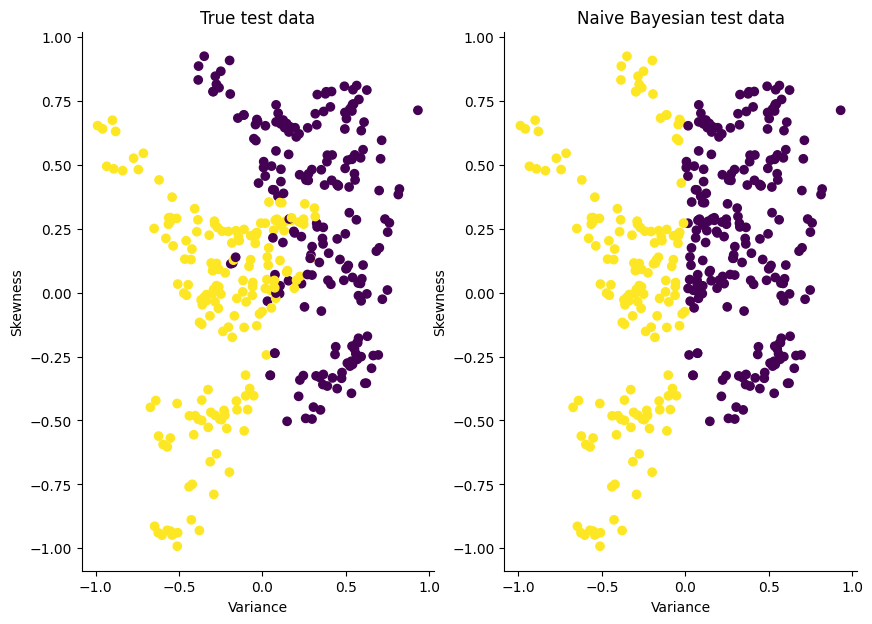

<ipython-input-453-736dc91346bc>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


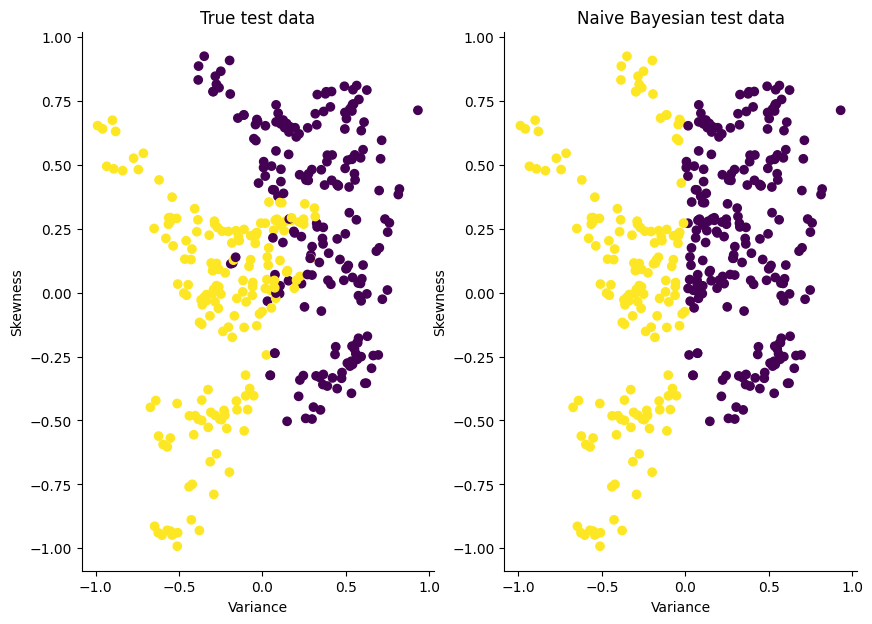

In [ ]:
fig = plt.subplots(figsize=(10, 7))

plt.subplot(1,2,1)

# Plot dei dati di addestramento
plt.scatter(X_test_std.iloc[:, 0], X_test_std.iloc[:, 1], c=y_test['class'].values)
plt.title('True test data')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(1,2,2)

# Plot dei dati di test
plt.scatter(X_test_std.iloc[:, 0], X_test_std.iloc[:, 1], c=predictions)

# Plot della retta di classificazione
plt.title('Naive Bayesian test data')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

## K-NN

In [ ]:
from scipy.spatial.distance import euclidean

def distance(point_one, point_two):
    """
    Calculate the Euclidean distance between two points.

    Parameters
    ----------
    point_one : array-like
        Coordinates of the first point.
    point_two : array-like
        Coordinates of the second point.

    Returns
    -------
    float
        Euclidean distance between the two points.
    """
    return euclidean(point_one, point_two)

def get_neighbors(train_set, test_point, label_col, n_neighbors):
    """
    Get the nearest neighbors of a test point in the training set.

    Parameters
    ----------
    train_set : array-like
        The training set containing data points.
    test_point : array-like
        The test point for which neighbors are to be found.
    label_col : array-like
        The labels corresponding to the training set.
    n_neighbors : int
        The number of neighbors to retrieve.

    Returns
    -------
    ordered_train : array-like
        The nearest neighbors in the training set.
    ordered_label : array-like
        The corresponding labels of the nearest neighbors.
    """
    # Calculate distances between the test point and all points in the training set
    dist = np.array([distance(train_point, test_point) for train_point in train_set])
    # Get indices that would sort the distances in ascending order
    idx_dist = dist.argsort()
    # Order the training set and labels based on the sorted distances
    ordered_train = train_set[idx_dist, :]
    ordered_label = label_col[idx_dist]
    # Return the top n_neighbors neighbors and their labels
    return ordered_train[:n_neighbors], ordered_label[:n_neighbors]

def predict(train_set, test_point, labels, n_neighbors):
    """
    Predict the label of a test point using k-nearest neighbors.

    Parameters
    ----------
    train_set : array-like
        The training set containing data points.
    test_point : array-like
        The test point for which the label is to be predicted.
    labels : array-like
        The labels corresponding to the training set.
    n_neighbors : int
        The number of neighbors to consider for the prediction.

    Returns
    -------
    predicted_label : array-like
        The predicted label for the test point.
    """
    # Get the nearest neighbors and their labels
    neigh, neigh_label = get_neighbors(train_set, test_point, labels, n_neighbors)
    # Count occurrences of each label among the neighbors
    values, counts = np.unique(neigh_label, return_counts=True)
    # Find the label with the highest count (majority class)
    idx = np.argmax(counts)
    # Return the predicted label
    return values[idx]

def evaluate(train_set, test_set, label, n_neighbors=2):
    """
    Evaluate the accuracy of k-nearest neighbors algorithm on a test set.

    Parameters
    ----------
    train_set : DataFrame
        The training dataset.
    test_set : DataFrame
        The test dataset.
    label : str
        The name of the column representing the class labels.
    n_neighbors : int, optional
        The number of neighbors to consider for the prediction. Default is 2.

    Returns
    -------
    accuracy : float
        The accuracy of the k-nearest neighbors algorithm on the test set.
    """
    # Initialize counters for correct and incorrect predictions
    correct_predict = 0
    wrong_predict = 0
    # Extract labels and features from the training and test sets
    train_labels = train_set[label].values
    train_set = train_set.drop(label, axis=1)
    test_labels = test_set[label].values
    test_set = test_set.drop(label, axis=1)

    # Iterate through each row in the test dataset
    for index in range(len(test_set.index)):
        # Predict the class label for the current test row
        result = predict(train_set.values, test_set.iloc[index].values, train_labels, n_neighbors)
        # Check if the predicted value matches the actual value
        if result == test_labels[index]:
            # Increase the correct prediction count
            correct_predict += 1
        else:
            # Increase the incorrect prediction count
            wrong_predict += 1

    # Calculate and return the accuracy
    accuracy = correct_predict / (correct_predict + wrong_predict)
    return accuracy

In [ ]:
knn_accuracy = evaluate(pd.concat([X_train_std,y_train], axis=1), pd.concat([X_test_std,y_test], axis=1), 'class')

In [ ]:
knn_accuracy

0.9973190348525469